In [1]:
import argparse
import numpy as np
import time
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import os
import sys
from scipy import signal
import skinematics as skin
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
#from scipy import signal
from taskcaller import taskcaller
from taskcaller_train1 import taskcaller_train1
import random
# modularized library import
from train_test_split_k import train_test_split_k
from rms import rms    
from copy import copy
from datetime import datetime
from maml import *

from math import pi
from math import cos
from math import floor

In [2]:
dtype="float64"
tf.keras.backend.set_floatx(dtype)
print('Python version: ', sys.version)
print('Tensorflow version: ', tf.__version__)

Python version:  3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
Tensorflow version:  2.2.0


## Import Dataset

In [3]:
S=30
# np.random.seed(S)
# random.seed(S)
# tf.random.set_seed(S)

system_rate = 60
k_train = 100
x_train1, t_train1, x_val1, t_val1,input_nm, target_nm, data_length, DELAY_SIZE, train_eule_data, anticipation_size, train_time_data = taskcaller_train1('../dataset/trainingtask1.csv', system_rate, k_train)
x_train2, t_train2, x_val2, t_val2,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask2.csv', system_rate, k_train)
x_train3, t_train3, x_val3, t_val3,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask3.csv', system_rate, k_train)
x_train4, t_train4, x_val4, t_val4, _, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask4.csv', system_rate, k_train)
x_train5, t_train5, x_val5, t_val5,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask5.csv', system_rate, k_train)
x_train6, t_train6, x_val6, t_val6,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask6.csv', system_rate, k_train)
x_train7, t_train7, x_val7, t_val7,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask7.csv', system_rate, k_train)
x_train8, t_train8, x_val8, t_val8,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask8.csv', system_rate, k_train)
x_train9, t_train9, x_val9, t_val9,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask9.csv', system_rate, k_train)
x_train10, t_train10, x_val10, t_val10,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask9.csv', system_rate, k_train)
#x_seq10, t_seq10, _, _,_, _, _, _, _, _, _ = taskcaller('trainingtask10.csv', system_rate, k)


traintaskx = [x_train1 , x_train2 , x_train3 , x_train4,x_train5,x_train6,x_train7,x_train8,x_train9,x_train10]
traintaskt = [t_train1 , t_train2 , t_train3 , t_train4,t_train5,t_train6,t_train7, t_train8, t_train9,t_train10]

valtaskx = [x_val1,x_val2,x_val3,x_val4,x_val5,x_val6,x_val7,x_val8,x_val9,x_val10]
valtaskt = [t_val1,t_val2,t_val3,t_val4,t_val5,t_val6,t_val7,t_val8,t_val9,t_val10]

numberoftask = len(traintaskx)

../dataset/trainingtask1.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask2.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask3.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask4.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask5.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask6.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask7.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask8.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask9.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask9.csv loaded...

Anticipation time: 300ms



In [4]:
ftml1 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [5]:
ftml2 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [6]:
ftml3 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [7]:
ftml4 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [8]:
ftml5 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [9]:
ftml6 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [10]:
def update_procedure(model,dtx, dty, lr = 0.001, grad_step =10, ca=True):
    
    all_loss = []
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
    lr_min = lr/20
    for step in range (grad_step):
        total_loss = 0
        if ca:
            lr_ca = cosine_annealing(step, grad_step, lr, lr_min)
            optimizer = tf.keras.optimizers.Adam(learning_rate = lr_ca)
        for i in range(len(dtx)):
            with tf.GradientTape() as update:
                _,loss = model_func(model, dtx[i], dty[i])
            gradient = update.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradient, model.trainable_variables))
            total_loss+=loss
        all_loss.append(total_loss/len(dtx))
        print('Step{} : loss = {}'.format(step,total_loss/len(dtx)))
    return model, all_loss  

## Normal

In [11]:

meta_step = 10
loss_ftml1 = []
total = []
all_eval_loss1 = []
all_train_loss1 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval1 = []
ftml_time1 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()

    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")
        ftml1, loss = train_maml(ftml1, meta_step, dtrainx, dtraint, dvalx, dvalt)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml1, loss = update_procedure(ftml1,dtstream_x, dtstream_t)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml1, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time1.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval1.append(eval_loss)
    all_train_loss1.append(train_loss)
    all_eval_loss1.append(eval_task)


Task  0
Meta Update
Training is starting
Step 0 : loss = 6.567361354827881
Step 1 : loss = 6.564826488494873
Step 2 : loss = 6.562237739562988
Step 3 : loss = 6.55959939956665
Step 4 : loss = 6.5569305419921875
Step 5 : loss = 6.554292678833008
Step 6 : loss = 6.551620960235596
Step 7 : loss = 6.548969268798828
Step 8 : loss = 6.546308517456055
Step 9 : loss = 6.543641567230225
Update Procedure
Step0 : loss = 6.543635845184326
Step1 : loss = 6.509415149688721
Step2 : loss = 6.475008487701416
Step3 : loss = 6.4429402351379395
Step4 : loss = 6.414368152618408
Step5 : loss = 6.390448570251465
Step6 : loss = 6.371486186981201
Step7 : loss = 6.357685089111328
Step8 : loss = 6.3486409187316895
Step9 : loss = 6.3434343338012695
Data stream Batch- 0 : loss = 4.7353196144104
Meta Update
Training is starting
Step 0 : loss = 6.790324449539185
Step 1 : loss = 6.786802530288696
Step 2 : loss = 6.783266544342041
Step 3 : loss = 6.779721975326538
Step 4 : loss = 6.7761571407318115
Step 5 : loss = 6.7

Step6 : loss = 2.6960550944010415
Step7 : loss = 2.6808642148971558
Step8 : loss = 2.6711671352386475
Step9 : loss = 2.6654168367385864
Data stream Batch- 2 : loss = 12.912852764129639
Meta Update
Training is starting
Step 0 : loss = 1.705052673816681
Step 1 : loss = 1.7045498291651409
Step 2 : loss = 1.7040468056996663
Step 3 : loss = 1.7035434047381084
Step 4 : loss = 1.7030454277992249
Step 5 : loss = 1.7025471329689026
Step 6 : loss = 1.702048420906067
Step 7 : loss = 1.7015496691068013
Step 8 : loss = 1.7010509570439656
Step 9 : loss = 1.700551986694336
Update Procedure
Step0 : loss = 2.4543535709381104
Step1 : loss = 2.4173997044563293
Step2 : loss = 2.386895477771759
Step3 : loss = 2.360544800758362
Step4 : loss = 2.3381712436676025
Step5 : loss = 2.319269508123398
Step6 : loss = 2.304040551185608
Step7 : loss = 2.2921369075775146
Step8 : loss = 2.2836421728134155
Step9 : loss = 2.2784512639045715
Data stream Batch- 3 : loss = 12.875322818756104
Meta Update
Training is starting


Step 6 : loss = 1.7872326669652785
Step 7 : loss = 1.787071148731879
Step 8 : loss = 1.7869095705153923
Step 9 : loss = 1.786748012616521
Update Procedure
Step0 : loss = 6.643643041451772
Step1 : loss = 6.454974253972371
Step2 : loss = 6.252496163050334
Step3 : loss = 6.109453320503235
Step4 : loss = 5.962769985198975
Step5 : loss = 5.826875110467275
Step6 : loss = 5.721419970194499
Step7 : loss = 5.6441089908281965
Step8 : loss = 5.59283043940862
Step9 : loss = 5.563689609368642
Data stream Batch- 5 : loss = 5.3767006397247314
Meta Update
Training is starting
Step 0 : loss = 1.7412150920442646
Step 1 : loss = 1.741005678800127
Step 2 : loss = 1.7407957479475984
Step 3 : loss = 1.7405855449182646
Step 4 : loss = 1.7403754936383358
Step 5 : loss = 1.740165044645232
Step 6 : loss = 1.7399545987979286
Step 7 : loss = 1.739743971641338
Step 8 : loss = 1.7395332280487295
Step 9 : loss = 1.7393222407275248
Update Procedure
Step0 : loss = 5.511024168559483
Step1 : loss = 5.318074839455741
Ste

Step7 : loss = 3.5799469836056232
Step8 : loss = 3.568542405962944
Step9 : loss = 3.5569255650043488
Data stream Batch- 7 : loss = 4.92261528968811
Task  4
Meta Update
Training is starting
Step 0 : loss = 0.41111875236396167
Step 1 : loss = 0.41021770874168145
Step 2 : loss = 0.4093148385213379
Step 3 : loss = 0.40840967495154157
Step 4 : loss = 0.4075026893584394
Step 5 : loss = 0.4065933450404655
Step 6 : loss = 0.4056824451862616
Step 7 : loss = 0.4047698464599879
Step 8 : loss = 0.40385524393195965
Step 9 : loss = 0.4029381197917061
Update Procedure
Step0 : loss = 1.477664828300476
Step1 : loss = 1.4040396213531494
Step2 : loss = 1.3330979347229004
Step3 : loss = 1.2684650421142578
Step4 : loss = 1.2127816677093506
Step5 : loss = 1.170393705368042
Step6 : loss = 1.1399301290512085
Step7 : loss = 1.1192123889923096
Step8 : loss = 1.1062954664230347
Step9 : loss = 1.099013090133667
Data stream Batch- 0 : loss = 4.579448699951172
Meta Update
Training is starting
Step 0 : loss = 0.3985

Step 4 : loss = 0.07905631234069137
Step 5 : loss = 0.07879222320940399
Step 6 : loss = 0.07851569789286378
Step 7 : loss = 0.07824863801289457
Step 8 : loss = 0.07797233555584794
Step 9 : loss = 0.0777067013847753
Update Procedure
Step0 : loss = 2.134705106417338
Step1 : loss = 2.028881589571635
Step2 : loss = 1.9126437505086262
Step3 : loss = 1.806294600168864
Step4 : loss = 1.6973884503046672
Step5 : loss = 1.6273080110549927
Step6 : loss = 1.5677632093429565
Step7 : loss = 1.5273277759552002
Step8 : loss = 1.498590886592865
Step9 : loss = 1.4827383955319722
Data stream Batch- 2 : loss = 3.9134899377822876
Meta Update
Training is starting
Step 0 : loss = 0.06020259879391212
Step 1 : loss = 0.06002969243686437
Step 2 : loss = 0.05985699891799815
Step 3 : loss = 0.059684746554306126
Step 4 : loss = 0.059514784284668186
Step 5 : loss = 0.05934488348861596
Step 6 : loss = 0.059175031096954565
Step 7 : loss = 0.05900525088468286
Step 8 : loss = 0.0588355133849557
Step 9 : loss = 0.058665

Step3 : loss = 2.3343201994895937
Step4 : loss = 2.2330752491950987
Step5 : loss = 2.1484744787216186
Step6 : loss = 2.0842126488685606
Step7 : loss = 2.038394606113434
Step8 : loss = 2.0092563390731812
Step9 : loss = 1.9930196523666381
Data stream Batch- 4 : loss = 7.4286768436431885
Meta Update
Training is starting
Step 0 : loss = 0.2296304725108693
Step 1 : loss = 0.2291224645581895
Step 2 : loss = 0.22861825673086864
Step 3 : loss = 0.22811402538473088
Step 4 : loss = 0.2276121367586779
Step 5 : loss = 0.22711440474329767
Step 6 : loss = 0.22661934141424092
Step 7 : loss = 0.2261339889654442
Step 8 : loss = 0.22565349039904356
Step 9 : loss = 0.22517545278153042
Update Procedure
Step0 : loss = 2.4223015109697976
Step1 : loss = 2.331046909093857
Step2 : loss = 2.2292589048544564
Step3 : loss = 2.1559050232172012
Step4 : loss = 2.0971534301837287
Step5 : loss = 2.050881644090017
Step6 : loss = 2.0146563748518624
Step7 : loss = 1.9889276226361592
Step8 : loss = 1.9720446517070134
Step

Step 0 : loss = 0.11563807200195406
Step 1 : loss = 0.11548341225948598
Step 2 : loss = 0.1153286752593277
Step 3 : loss = 0.11517374269834504
Step 4 : loss = 0.11501897126529667
Step 5 : loss = 0.11486478678332113
Step 6 : loss = 0.11471055058185094
Step 7 : loss = 0.11455627401911957
Step 8 : loss = 0.11440200213721455
Step 9 : loss = 0.11424765363327902
Update Procedure
Step0 : loss = 2.3624300453811884
Step1 : loss = 2.28398771956563
Step2 : loss = 2.166348844766617
Step3 : loss = 2.13233395665884
Step4 : loss = 2.0479109548032284
Step5 : loss = 2.0263855308294296
Step6 : loss = 1.9194719046354294
Step7 : loss = 1.893497010692954
Step8 : loss = 1.8682563919574022
Step9 : loss = 1.8540987251326442
Data stream Batch- 7 : loss = 4.052877426147461
Task  8
Meta Update
Training is starting
Step 0 : loss = 0.128385196632958
Step 1 : loss = 0.12826665128407416
Step 2 : loss = 0.12814809175547182
Step 3 : loss = 0.12802947856703684
Step 4 : loss = 0.12791115250747873
Step 5 : loss = 0.12779

Step 7 : loss = 0.1629823774119203
Step 8 : loss = 0.16291405771425213
Step 9 : loss = 0.162845724393332
Update Procedure
Step0 : loss = 0.5837623924016953
Step1 : loss = 0.5634979605674744
Step2 : loss = 0.5472833514213562
Step3 : loss = 0.5470037758350372
Step4 : loss = 0.5222673714160919
Step5 : loss = 0.5245067775249481
Step6 : loss = 0.5040735155344009
Step7 : loss = 0.5055539160966873
Step8 : loss = 0.4967210739850998
Step9 : loss = 0.49473391473293304
Data stream Batch- 1 : loss = 2.0004314184188843
Meta Update
Training is starting
Step 0 : loss = 0.16176230206927772
Step 1 : loss = 0.16169668605943643
Step 2 : loss = 0.16163110979715542
Step 3 : loss = 0.1615655335346766
Step 4 : loss = 0.16149994402718443
Step 5 : loss = 0.16143436757560548
Step 6 : loss = 0.16136914912998931
Step 7 : loss = 0.1613043677364241
Step 8 : loss = 0.1612395594731211
Step 9 : loss = 0.16117494952277614
Update Procedure
Step0 : loss = 0.6199307143688202
Step1 : loss = 0.671996682882309
Step2 : loss =

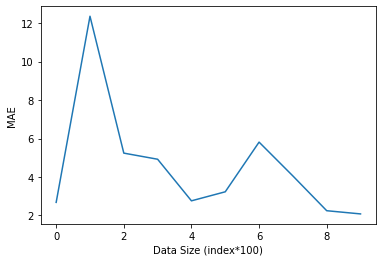

In [12]:
plt.figure(1)   
plt.plot(ftml_eval1)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [13]:
print(len(xtask_buffer))

80


## Fixed

In [14]:

meta_step = 10
loss_ftml2 = []
total = []
all_eval_loss2 = []
all_train_loss2 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval2 = []
ftml_time2 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()
    if len(xtask_buffer) >= 24:
        xtask_buffer = xtask_buffer[8:]
        ttask_buffer = ttask_buffer[8:] 


    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")
        ftml2, loss = train_maml(ftml2, meta_step, dtrainx, dtraint, dvalx, dvalt)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml2, loss = update_procedure(ftml2,dtstream_x, dtstream_t)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml2, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time2.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval2.append(eval_loss)
    all_train_loss2.append(train_loss)
    all_eval_loss2.append(eval_task)


Task  0
Meta Update
Training is starting
Step 0 : loss = 6.79915714263916
Step 1 : loss = 6.796501636505127
Step 2 : loss = 6.793860912322998
Step 3 : loss = 6.791231632232666
Step 4 : loss = 6.788629055023193
Step 5 : loss = 6.7860188484191895
Step 6 : loss = 6.783437728881836
Step 7 : loss = 6.780868053436279
Step 8 : loss = 6.7783002853393555
Step 9 : loss = 6.775743007659912
Update Procedure
Step0 : loss = 6.775749683380127
Step1 : loss = 6.745910167694092
Step2 : loss = 6.718709945678711
Step3 : loss = 6.6939616203308105
Step4 : loss = 6.672387599945068
Step5 : loss = 6.654598236083984
Step6 : loss = 6.640836715698242
Step7 : loss = 6.630985260009766
Step8 : loss = 6.624664783477783
Step9 : loss = 6.621097564697266
Data stream Batch- 0 : loss = 4.845327854156494
Meta Update
Training is starting
Step 0 : loss = 7.0730955600738525
Step 1 : loss = 7.07078742980957
Step 2 : loss = 7.068506956100464
Step 3 : loss = 7.066232681274414
Step 4 : loss = 7.063975095748901
Step 5 : loss = 7.0

Step5 : loss = 2.91353968779246
Step6 : loss = 2.902465264002482
Step7 : loss = 2.8923203150431314
Step8 : loss = 2.8841905991236367
Step9 : loss = 2.879106283187866
Data stream Batch- 2 : loss = 12.762478828430176
Meta Update
Training is starting
Step 0 : loss = 1.481438914934794
Step 1 : loss = 1.4802955587704978
Step 2 : loss = 1.4791528582572937
Step 3 : loss = 1.4780087073644004
Step 4 : loss = 1.4768633246421814
Step 5 : loss = 1.4757181008656821
Step 6 : loss = 1.4745740294456482
Step 7 : loss = 1.4734287858009338
Step 8 : loss = 1.4722824891408286
Step 9 : loss = 1.4711348613103232
Update Procedure
Step0 : loss = 2.5282841324806213
Step1 : loss = 2.4973071813583374
Step2 : loss = 2.4675721526145935
Step3 : loss = 2.4391722679138184
Step4 : loss = 2.415038585662842
Step5 : loss = 2.392860770225525
Step6 : loss = 2.374675154685974
Step7 : loss = 2.360131651163101
Step8 : loss = 2.3493732810020447
Step9 : loss = 2.3427358269691467
Data stream Batch- 3 : loss = 12.766521453857422
M

Step 5 : loss = 1.8141342323509946
Step 6 : loss = 1.81400205142323
Step 7 : loss = 1.8138697455267585
Step 8 : loss = 1.8137373917750896
Step 9 : loss = 1.8136050314657273
Update Procedure
Step0 : loss = 6.142418960730235
Step1 : loss = 5.964764455954234
Step2 : loss = 5.765830000241597
Step3 : loss = 5.607615868250529
Step4 : loss = 5.4533031185468035
Step5 : loss = 5.322743535041809
Step6 : loss = 5.219640890757243
Step7 : loss = 5.140301903088887
Step8 : loss = 5.088330149650574
Step9 : loss = 5.058191816012065
Data stream Batch- 5 : loss = 5.05586838722229
Meta Update
Training is starting
Step 0 : loss = 1.7651675843352836
Step 1 : loss = 1.764985565362232
Step 2 : loss = 1.7648037760030655
Step 3 : loss = 1.7646215305974087
Step 4 : loss = 1.7644391463626
Step 5 : loss = 1.7642566037615612
Step 6 : loss = 1.7640737063591443
Step 7 : loss = 1.7638907664647652
Step 8 : loss = 1.7637074522319294
Step 9 : loss = 1.7635241124483327
Update Procedure
Step0 : loss = 5.053332516125271
Ste

Step8 : loss = 3.211492531001568
Step9 : loss = 3.195457998663187
Data stream Batch- 7 : loss = 3.815248131752014
Task  4
Meta Update
Training is starting
Step 0 : loss = 0.5542215938206821
Step 1 : loss = 0.549055307744337
Step 2 : loss = 0.5437870447420412
Step 3 : loss = 0.5384950544389467
Step 4 : loss = 0.5331833447610576
Step 5 : loss = 0.5279401176505618
Step 6 : loss = 0.5226885370466681
Step 7 : loss = 0.517318997030989
Step 8 : loss = 0.5120223443881269
Step 9 : loss = 0.506621491178752
Update Procedure
Step0 : loss = 1.9130759239196777
Step1 : loss = 1.824837327003479
Step2 : loss = 1.7397055625915527
Step3 : loss = 1.6613304615020752
Step4 : loss = 1.5929811000823975
Step5 : loss = 1.537660837173462
Step6 : loss = 1.4949889183044434
Step7 : loss = 1.4648261070251465
Step8 : loss = 1.4453845024108887
Step9 : loss = 1.4344358444213867
Data stream Batch- 0 : loss = 6.0573296546936035
Meta Update
Training is starting
Step 0 : loss = 0.5819956568868032
Step 1 : loss = 0.57679410

Step 7 : loss = 0.2629904798276368
Step 8 : loss = 0.2612174607857707
Step 9 : loss = 0.2594486415341851
Update Procedure
Step0 : loss = 2.789738098780314
Step1 : loss = 2.668741782506307
Step2 : loss = 2.568775177001953
Step3 : loss = 2.4786790211995444
Step4 : loss = 2.4048006931940713
Step5 : loss = 2.3327716986338296
Step6 : loss = 2.278436819712321
Step7 : loss = 2.238118131955465
Step8 : loss = 2.2134538888931274
Step9 : loss = 2.1985350449879966
Data stream Batch- 2 : loss = 4.340638041496277
Meta Update
Training is starting
Step 0 : loss = 0.23590500080100602
Step 1 : loss = 0.23442335211272752
Step 2 : loss = 0.23294909219405363
Step 3 : loss = 0.23148804478982965
Step 4 : loss = 0.2300293154970166
Step 5 : loss = 0.2285717012390258
Step 6 : loss = 0.2271152956455591
Step 7 : loss = 0.22566007510832853
Step 8 : loss = 0.22420667309373143
Step 9 : loss = 0.2227544307243079
Update Procedure
Step0 : loss = 2.727753460407257
Step1 : loss = 2.616328150033951
Step2 : loss = 2.484363

Step7 : loss = 2.102636969089508
Step8 : loss = 2.087873822450638
Step9 : loss = 2.0791928231716157
Data stream Batch- 4 : loss = 8.151681184768677
Meta Update
Training is starting
Step 0 : loss = 0.9074657336350471
Step 1 : loss = 0.8975037803489064
Step 2 : loss = 0.8879641122761227
Step 3 : loss = 0.8781358659977004
Step 4 : loss = 0.8687109167022364
Step 5 : loss = 0.8594673340401006
Step 6 : loss = 0.8506746529468469
Step 7 : loss = 0.8413924950574125
Step 8 : loss = 0.8323023472513471
Step 9 : loss = 0.8233663422129457
Update Procedure
Step0 : loss = 2.4336047967274985
Step1 : loss = 2.354415828982989
Step2 : loss = 2.288052270809809
Step3 : loss = 2.2234314531087875
Step4 : loss = 2.1637035061915717
Step5 : loss = 2.112046385804812
Step6 : loss = 2.07229212919871
Step7 : loss = 2.043422485391299
Step8 : loss = 2.0240521927674613
Step9 : loss = 2.0129817525545755
Data stream Batch- 5 : loss = 7.5429909229278564
Meta Update
Training is starting
Step 0 : loss = 0.7287685530408035
S

Step 5 : loss = 0.41764703808973236
Step 6 : loss = 0.41642138443384613
Step 7 : loss = 0.41519474411708496
Step 8 : loss = 0.41398047132506255
Step 9 : loss = 0.41280548552139884
Update Procedure
Step0 : loss = 2.126095950603485
Step1 : loss = 2.0534473303705454
Step2 : loss = 1.9338795263320208
Step3 : loss = 1.7966951513662934
Step4 : loss = 1.7587222214788198
Step5 : loss = 1.682214681059122
Step6 : loss = 1.6031664963811636
Step7 : loss = 1.5816709520295262
Step8 : loss = 1.5482561653479934
Step9 : loss = 1.530186259187758
Data stream Batch- 7 : loss = 3.354166865348816
Task  8
Meta Update
Training is starting
Step 0 : loss = 0.4372602604876553
Step 1 : loss = 0.43414683692223793
Step 2 : loss = 0.4309857582503427
Step 3 : loss = 0.4279705454458645
Step 4 : loss = 0.4244706412518604
Step 5 : loss = 0.42101171670688525
Step 6 : loss = 0.4173144113002641
Step 7 : loss = 0.41407114238781295
Step 8 : loss = 0.4105420603427947
Step 9 : loss = 0.40736227150681237
Update Procedure
Step0 

Step5 : loss = 0.48657478392124176
Step6 : loss = 0.4789207875728607
Step7 : loss = 0.47445274889469147
Step8 : loss = 0.4706956744194031
Step9 : loss = 0.46857011318206787
Data stream Batch- 1 : loss = 2.0734753012657166
Meta Update
Training is starting
Step 0 : loss = 0.7883519688569424
Step 1 : loss = 0.7868826687151181
Step 2 : loss = 0.7854397815637408
Step 3 : loss = 0.7839987685519552
Step 4 : loss = 0.7825790204521682
Step 5 : loss = 0.7811637386583561
Step 6 : loss = 0.7797530732538905
Step 7 : loss = 0.7783440660537472
Step 8 : loss = 0.7769386248958726
Step 9 : loss = 0.775567457026669
Update Procedure
Step0 : loss = 0.40623757243156433
Step1 : loss = 0.459250807762146
Step2 : loss = 0.4090395172437032
Step3 : loss = 0.4369977116584778
Step4 : loss = 0.40361955761909485
Step5 : loss = 0.4187942345937093
Step6 : loss = 0.3949865500132243
Step7 : loss = 0.3989090323448181
Step8 : loss = 0.3875877062479655
Step9 : loss = 0.3851012686888377
Data stream Batch- 2 : loss = 2.083433

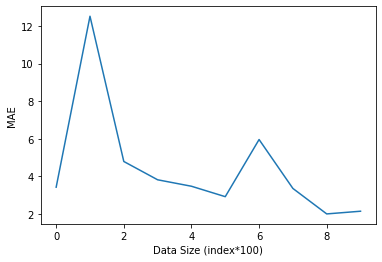

In [15]:
plt.figure(1)   
plt.plot(ftml_eval2)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [16]:
print(len(xtask_buffer))

24


In [17]:

meta_step = 10
loss_ftml3 = []
total = []
all_eval_loss3 = []
all_train_loss3 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval3 = []
ftml_time3 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()

    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")
        ftml3, loss = train_maml(ftml3, meta_step, dtrainx, dtraint, dvalx, dvalt, ca=True)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml3, loss = update_procedure(ftml3,dtstream_x, dtstream_t, ca=True)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml3, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time3.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval3.append(eval_loss)
    all_train_loss3.append(train_loss)
    all_eval_loss3.append(eval_task)


Task  0
Meta Update
Training is starting
0.001
Step 0 : loss = 6.4485273361206055
0.0009757729755661011
Step 1 : loss = 6.445683479309082
0.000905463412215599
Step 2 : loss = 6.442907333374023
0.0007959536998847742
Step 3 : loss = 6.4403300285339355
0.000657963412215599
Step 4 : loss = 6.438053131103516
0.000505
Step 5 : loss = 6.436165809631348
0.0003520365877844011
Step 6 : loss = 6.434706211090088
0.00021404630011522585
Step 7 : loss = 6.433692455291748
0.00010453658778440107
Step 8 : loss = 6.433074951171875
3.4227024433899005e-05
Step 9 : loss = 6.432774066925049
Update Procedure
Step0 : loss = 6.435548782348633
Step1 : loss = 6.401409149169922
Step2 : loss = 6.36734676361084
Step3 : loss = 6.33492374420166
Step4 : loss = 6.306272029876709
Step5 : loss = 6.282154560089111
Step6 : loss = 6.263118743896484
Step7 : loss = 6.249334335327148
Step8 : loss = 6.240374565124512
Step9 : loss = 6.235240936279297
Data stream Batch- 0 : loss = 4.6911704540252686
Meta Update
Training is startin

Step 8 : loss = 1.879413624604543
3.4227024433899005e-05
Step 9 : loss = 1.8793681065241497
Update Procedure
Step0 : loss = 3.4157257080078125
Step1 : loss = 3.3783206939697266
Step2 : loss = 3.3417534828186035
Step3 : loss = 3.3081207275390625
Step4 : loss = 3.2790298461914062
Step5 : loss = 3.2550928592681885
Step6 : loss = 3.2366249561309814
Step7 : loss = 3.2235729694366455
Step8 : loss = 3.215550184249878
Step9 : loss = 3.2110588550567627
Data stream Batch- 0 : loss = 13.059624671936035
Meta Update
Training is starting
0.001
Step 0 : loss = 1.8752045234044392
0.0009757729755661011
Step 1 : loss = 1.874800483385722
0.000905463412215599
Step 2 : loss = 1.8744081656138103
0.0007959536998847742
Step 3 : loss = 1.8740444580713909
0.000657963412215599
Step 4 : loss = 1.8737262884775798
0.000505
Step 5 : loss = 1.8735023538271587
0.0003520365877844011
Step 6 : loss = 1.8733007709185283
0.00021404630011522585
Step 7 : loss = 1.8731603821118672
0.00010453658778440107
Step 8 : loss = 1.8730

Step 0 : loss = 1.906995480495786
0.0009757729755661011
Step 1 : loss = 1.9069321097185215
0.000905463412215599
Step 2 : loss = 1.9068700782392942
0.0007959536998847742
Step 3 : loss = 1.9068125734046575
0.000657963412215599
Step 4 : loss = 1.9067621039078821
0.000505
Step 5 : loss = 1.9067201762327126
0.0003520365877844011
Step 6 : loss = 1.9066881475526662
0.00021404630011522585
Step 7 : loss = 1.9066657845374375
0.00010453658778440107
Step 8 : loss = 1.9066522023773618
3.4227024433899005e-05
Step 9 : loss = 1.9066453715254155
Update Procedure
Step0 : loss = 9.963326692581177
Step1 : loss = 9.835256814956665
Step2 : loss = 9.706962823867798
Step3 : loss = 9.590268611907959
Step4 : loss = 9.488642454147339
Step5 : loss = 9.404537439346313
Step6 : loss = 9.339524269104004
Step7 : loss = 9.295886754989624
Step8 : loss = 9.268061876296997
Step9 : loss = 9.252272129058838
Data stream Batch- 1 : loss = 4.950693130493164
Meta Update
Training is starting
0.001
Step 0 : loss = 1.8971422719843

Step 8 : loss = 0.4137986836446997
3.4227024433899005e-05
Step 9 : loss = 0.4137933477862015
Update Procedure
Step0 : loss = 8.88300108909607
Step1 : loss = 8.718104124069214
Step2 : loss = 8.560718059539795
Step3 : loss = 8.415068864822388
Step4 : loss = 8.285775899887085
Step5 : loss = 8.1772780418396
Step6 : loss = 8.093446731567383
Step7 : loss = 8.033504247665405
Step8 : loss = 7.994714021682739
Step9 : loss = 7.972571134567261
Data stream Batch- 1 : loss = 7.639914035797119
Meta Update
Training is starting
0.001
Step 0 : loss = 0.40593019883844117
0.0009757729755661011
Step 1 : loss = 0.40587478194269394
0.000905463412215599
Step 2 : loss = 0.40582067087161017
0.0007959536998847742
Step 3 : loss = 0.40577042722137957
0.000657963412215599
Step 4 : loss = 0.40572626774308557
0.000505
Step 5 : loss = 0.40569007557244
0.0003520365877844011
Step 6 : loss = 0.40566274254861306
0.00021404630011522585
Step 7 : loss = 0.40564364540823955
0.00010453658778440107
Step 8 : loss = 0.4056320664

Step 0 : loss = 0.548028080855485
0.0009757729755661011
Step 1 : loss = 0.547483078265269
0.000905463412215599
Step 2 : loss = 0.546950621462088
0.0007959536998847742
Step 3 : loss = 0.5464557953111308
0.000657963412215599
Step 4 : loss = 0.5460203162812162
0.000505
Step 5 : loss = 0.5456600246376555
0.0003520365877844011
Step 6 : loss = 0.5453832217238497
0.00021404630011522585
Step 7 : loss = 0.5451900922932782
0.00010453658778440107
Step 8 : loss = 0.5450726552693008
3.4227024433899005e-05
Step 9 : loss = 0.5450153272743721
Update Procedure
Step0 : loss = 3.466107964515686
Step1 : loss = 3.4210725824038186
Step2 : loss = 3.366802970568339
Step3 : loss = 3.329220732053121
Step4 : loss = 3.285882751146952
Step5 : loss = 3.2545621196428933
Step6 : loss = 3.22947895526886
Step7 : loss = 3.2099892497062683
Step8 : loss = 3.1970625718434653
Step9 : loss = 3.1895843346913657
Data stream Batch- 2 : loss = 6.952209949493408
Meta Update
Training is starting
0.001
Step 0 : loss = 0.55103797718

Step 7 : loss = 0.1405131097766707
0.00010453658778440107
Step 8 : loss = 0.1404487398134019
3.4227024433899005e-05
Step 9 : loss = 0.14041731197079205
Update Procedure
Step0 : loss = 7.484346389770508
Step1 : loss = 7.267632166544597
Step2 : loss = 7.061359961827596
Step3 : loss = 6.8630227247873945
Step4 : loss = 6.682448863983154
Step5 : loss = 6.52619202931722
Step6 : loss = 6.403301000595093
Step7 : loss = 6.314095099767049
Step8 : loss = 6.256765683492024
Step9 : loss = 6.224168221155803
Data stream Batch- 2 : loss = 9.053284645080566
Meta Update
Training is starting
0.001
Step 0 : loss = 0.15959024322841064
0.0009757729755661011
Step 1 : loss = 0.15919095138385622
0.000905463412215599
Step 2 : loss = 0.1588014954025251
0.0007959536998847742
Step 3 : loss = 0.15844021910085868
0.000657963412215599
Step 4 : loss = 0.15812276598494332
0.000505
Step 5 : loss = 0.1578604727860147
0.0003520365877844011
Step 6 : loss = 0.15765924890252742
0.00021404630011522585
Step 7 : loss = 0.157519

Step 0 : loss = 0.27405195362993245
0.0009757729755661011
Step 1 : loss = 0.27325447577843454
0.000905463412215599
Step 2 : loss = 0.27247606411211184
0.0007959536998847742
Step 3 : loss = 0.27175349269246346
0.000657963412215599
Step 4 : loss = 0.27111820326659786
0.000505
Step 5 : loss = 0.2705930207448574
0.0003520365877844011
Step 6 : loss = 0.2701898325829924
0.00021404630011522585
Step 7 : loss = 0.2699087211593114
0.00010453658778440107
Step 8 : loss = 0.26973829827478407
3.4227024433899005e-05
Step 9 : loss = 0.26965535580408323
Update Procedure
Step0 : loss = 3.643478810787201
Step1 : loss = 3.3740036487579346
Step2 : loss = 3.1612654626369476
Step3 : loss = 3.0403620302677155
Step4 : loss = 2.9595005810260773
Step5 : loss = 2.896840125322342
Step6 : loss = 2.8479672968387604
Step7 : loss = 2.8134507834911346
Step8 : loss = 2.791130691766739
Step9 : loss = 2.778405874967575
Data stream Batch- 3 : loss = 9.54624319076538
Meta Update
Training is starting
0.001
Step 0 : loss = 0.

Step 7 : loss = 0.13330183393208583
0.00010453658778440107
Step 8 : loss = 0.13328144417915405
3.4227024433899005e-05
Step 9 : loss = 0.1332714968028648
Update Procedure
Step0 : loss = 1.4166198670864105
Step1 : loss = 1.3540003895759583
Step2 : loss = 1.298431545495987
Step3 : loss = 1.2513798475265503
Step4 : loss = 1.1993250846862793
Step5 : loss = 1.1620513498783112
Step6 : loss = 1.1287034451961517
Step7 : loss = 1.1043700724840164
Step8 : loss = 1.0857831537723541
Step9 : loss = 1.075050950050354
Data stream Batch- 3 : loss = 6.816753149032593
Meta Update
Training is starting
0.001
Step 0 : loss = 0.1300509894941336
0.0009757729755661011
Step 1 : loss = 0.12995459089568154
0.000905463412215599
Step 2 : loss = 0.1298605058542305
0.0007959536998847742
Step 3 : loss = 0.12977316969581243
0.000657963412215599
Step 4 : loss = 0.12969638052296917
0.000505
Step 5 : loss = 0.12963288655626615
0.0003520365877844011
Step 6 : loss = 0.12958413707360655
0.00021404630011522585
Step 7 : loss =

Step4 : loss = 0.9262495562434196
Step5 : loss = 0.9179132655262947
Step6 : loss = 0.8964917100965977
Step7 : loss = 0.8897220380604267
Step8 : loss = 0.880445159971714
Step9 : loss = 0.8759655877947807
Data stream Batch- 3 : loss = 1.8883702456951141
Meta Update
Training is starting
0.001
Step 0 : loss = 0.17019525163369265
0.0009757729755661011
Step 1 : loss = 0.1699328084113963
0.000905463412215599
Step 2 : loss = 0.16967659165881538
0.0007959536998847742
Step 3 : loss = 0.16943946954635947
0.000657963412215599
Step 4 : loss = 0.1692302717679248
0.000505
Step 5 : loss = 0.16905729192717484
0.0003520365877844011
Step 6 : loss = 0.16892444539868068
0.00021404630011522585
Step 7 : loss = 0.1688318524326584
0.00010453658778440107
Step 8 : loss = 0.16877550822488974
3.4227024433899005e-05
Step 9 : loss = 0.1687479991982593
Update Procedure
Step0 : loss = 1.4461776226758958
Step1 : loss = 1.4290181159973145
Step2 : loss = 1.418268358707428
Step3 : loss = 1.4019163072109222
Step4 : loss = 

Step 1 : loss = 0.1733098836683286
0.000905463412215599
Step 2 : loss = 0.17323822569270086
0.0007959536998847742
Step 3 : loss = 0.1731716843905405
0.000657963412215599
Step 4 : loss = 0.1731131735456276
0.000505
Step 5 : loss = 0.1730648299991269
0.0003520365877844011
Step 6 : loss = 0.17302773499359414
0.00021404630011522585
Step 7 : loss = 0.1730018749165735
0.00010453658778440107
Step 8 : loss = 0.17298612953448858
3.4227024433899005e-05
Step 9 : loss = 0.17297846815888723
Update Procedure
Step0 : loss = 1.276012110710144
Step1 : loss = 1.2472051143646241
Step2 : loss = 1.2660635173320771
Step3 : loss = 1.2301482260227203
Step4 : loss = 1.2302951514720917
Step5 : loss = 1.2041236817836762
Step6 : loss = 1.2072742640972138
Step7 : loss = 1.189265251159668
Step8 : loss = 1.1857772946357727
Step9 : loss = 1.1807514011859894
Data stream Batch- 4 : loss = 2.1369335651397705
Meta Update
Training is starting
0.001
Step 0 : loss = 0.17324961433943073
0.0009757729755661011
Step 1 : loss = 

In [18]:
print(len(xtask_buffer))

80


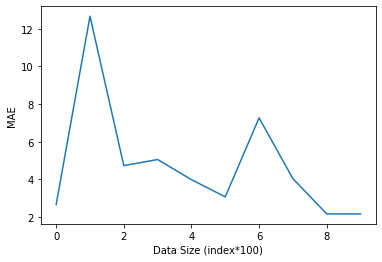

In [19]:
plt.figure(1)   
plt.plot(ftml_eval3)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [20]:

meta_step = 10
loss_ftml4 = []
total = []
all_eval_loss4 = []
all_train_loss4 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval4 = []
ftml_time4 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()

    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")

        ftml4, loss = train_maml(ftml4, meta_step, dtrainx, dtraint, dvalx, dvalt, da=True)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml, loss = update_procedure(ftml4,dtstream_x, dtstream_t)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml4, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time4.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval4.append(eval_loss)
    all_train_loss4.append(train_loss)
    all_eval_loss4.append(eval_task)


Task  0
Meta Update
Training is starting
order_one
Step 0 : loss = 6.78438663482666
order_one
Step 1 : loss = 6.78438663482666
order_one
Step 2 : loss = 6.78438663482666
order_one
Step 3 : loss = 6.78438663482666
order_one
Step 4 : loss = 6.78438663482666
order_one
Step 5 : loss = 6.78438663482666
Step 6 : loss = 6.78438663482666
Step 7 : loss = 6.77584981918335
Step 8 : loss = 6.767442226409912
Step 9 : loss = 6.759089946746826
Update Procedure
Step0 : loss = 6.7591705322265625
Step1 : loss = 6.695928573608398
Step2 : loss = 6.635921478271484
Step3 : loss = 6.581946849822998
Step4 : loss = 6.536756992340088
Step5 : loss = 6.501026153564453
Step6 : loss = 6.4742431640625
Step7 : loss = 6.455479145050049
Step8 : loss = 6.44355583190918
Step9 : loss = 6.436834335327148
Data stream Batch- 0 : loss = 4.748936414718628
Meta Update
Training is starting
order_one
Step 0 : loss = 6.875959634780884
order_one
Step 1 : loss = 6.875959634780884
order_one
Step 2 : loss = 6.875959634780884
order_one

order_one
Step 0 : loss = 1.703957994778951
order_one
Step 1 : loss = 1.703957994778951
order_one
Step 2 : loss = 1.703957994778951
order_one
Step 3 : loss = 1.703957994778951
order_one
Step 4 : loss = 1.703957994778951
order_one
Step 5 : loss = 1.703957994778951
Step 6 : loss = 1.703957994778951
Step 7 : loss = 1.7031530141830444
Step 8 : loss = 1.7023469805717468
Step 9 : loss = 1.701541821161906
Update Procedure
Step0 : loss = 4.0201395352681475
Step1 : loss = 3.924543778101603
Step2 : loss = 3.833010991414388
Step3 : loss = 3.748831828435262
Step4 : loss = 3.6741857528686523
Step5 : loss = 3.612203359603882
Step6 : loss = 3.564357042312622
Step7 : loss = 3.5304136276245117
Step8 : loss = 3.508709112803141
Step9 : loss = 3.496394236882528
Data stream Batch- 2 : loss = 13.058799743652344
Meta Update
Training is starting
order_one
Step 0 : loss = 1.6484653155008953
order_one
Step 1 : loss = 1.6484653155008953
order_one
Step 2 : loss = 1.6484653155008953
order_one
Step 3 : loss = 1.648

Step9 : loss = 9.456043899059296
Data stream Batch- 3 : loss = 4.688687801361084
Meta Update
Training is starting
order_one
Step 0 : loss = 1.9261882999468418
order_one
Step 1 : loss = 1.9261882999468418
order_one
Step 2 : loss = 1.9261882999468418
order_one
Step 3 : loss = 1.9261882999468418
order_one
Step 4 : loss = 1.9261882999468418
order_one
Step 5 : loss = 1.9261882999468418
Step 6 : loss = 1.9261882999468418
Step 7 : loss = 1.9261463911523895
Step 8 : loss = 1.9261045842889755
Step 9 : loss = 1.926062647146838
Update Procedure
Step0 : loss = 9.042526197433471
Step1 : loss = 8.883815717697143
Step2 : loss = 8.729035043716431
Step3 : loss = 8.580320739746094
Step4 : loss = 8.447828340530396
Step5 : loss = 8.339817571640015
Step6 : loss = 8.256092262268066
Step7 : loss = 8.193841028213502
Step8 : loss = 8.153477191925049
Step9 : loss = 8.130744886398315
Data stream Batch- 4 : loss = 4.706570386886597
Meta Update
Training is starting
order_one
Step 0 : loss = 1.9051054363212887
orde

Step3 : loss = 3.8679919441541037
Step4 : loss = 3.814058934648832
Step5 : loss = 3.775560716787974
Step6 : loss = 3.7318682869275412
Step7 : loss = 3.707597926259041
Step8 : loss = 3.689771354198456
Step9 : loss = 3.6799033482869468
Data stream Batch- 5 : loss = 5.532675504684448
Meta Update
Training is starting
order_one
Step 0 : loss = 0.3544420681058975
order_one
Step 1 : loss = 0.3544420681058975
order_one
Step 2 : loss = 0.3544420681058975
order_one
Step 3 : loss = 0.3544420681058975
order_one
Step 4 : loss = 0.3544420681058975
order_one
Step 5 : loss = 0.3544420681058975
Step 6 : loss = 0.3544420681058975
Step 7 : loss = 0.3543345707459092
Step 8 : loss = 0.35422696443547674
Step 9 : loss = 0.3541192543483243
Update Procedure
Step0 : loss = 4.3639325967856815
Step1 : loss = 4.298477364437921
Step2 : loss = 4.223014725106103
Step3 : loss = 4.169176348618099
Step4 : loss = 4.11287847161293
Step5 : loss = 4.073345507894244
Step6 : loss = 4.034308514424732
Step7 : loss = 4.012147469

Step 7 : loss = 0.3581280387483472
Step 8 : loss = 0.3571179581546101
Step 9 : loss = 0.356106235481659
Update Procedure
Step0 : loss = 4.855385452508926
Step1 : loss = 4.722140334546566
Step2 : loss = 4.574536636471748
Step3 : loss = 4.45733930170536
Step4 : loss = 4.3330662958323956
Step5 : loss = 4.256479829549789
Step6 : loss = 4.176885232329369
Step7 : loss = 4.131646603345871
Step8 : loss = 4.09546659514308
Step9 : loss = 4.076305579394102
Data stream Batch- 7 : loss = 4.345850944519043
Task  5
Meta Update
Training is starting
order_one
Step 0 : loss = 0.11429087421722446
order_one
Step 1 : loss = 0.11429087421722446
order_one
Step 2 : loss = 0.11429087421722446
order_one
Step 3 : loss = 0.11429087421722446
order_one
Step 4 : loss = 0.11429087421722446
order_one
Step 5 : loss = 0.11429087421722446
Step 6 : loss = 0.11429087421722446
Step 7 : loss = 0.11412182023384813
Step 8 : loss = 0.11395277838075038
Step 9 : loss = 0.11378377841777401
Update Procedure
Step0 : loss = 7.3401293

order_one
Step 0 : loss = 0.14495898317238162
order_one
Step 1 : loss = 0.14495898317238162
order_one
Step 2 : loss = 0.14495898317238162
order_one
Step 3 : loss = 0.14495898317238162
order_one
Step 4 : loss = 0.14495898317238162
order_one
Step 5 : loss = 0.14495898317238162
Step 6 : loss = 0.14495898317238162
Step 7 : loss = 0.14451754835667455
Step 8 : loss = 0.1440792455704382
Step 9 : loss = 0.1436748505766308
Update Procedure
Step0 : loss = 3.9116299152374268
Step1 : loss = 3.750896692276001
Step2 : loss = 3.599374771118164
Step3 : loss = 3.461305856704712
Step4 : loss = 3.3415685892105103
Step5 : loss = 3.2420395612716675
Step6 : loss = 3.165386915206909
Step7 : loss = 3.111124873161316
Step8 : loss = 3.0765575170516968
Step9 : loss = 3.0570863485336304
Data stream Batch- 1 : loss = 10.166574001312256
Meta Update
Training is starting
order_one
Step 0 : loss = 0.20296399244515415
order_one
Step 1 : loss = 0.20296399244515415
order_one
Step 2 : loss = 0.20296399244515415
order_one


Step4 : loss = 2.1283617417017617
Step5 : loss = 2.071940819422404
Step6 : loss = 2.031782070795695
Step7 : loss = 2.003188371658325
Step8 : loss = 1.9838370084762573
Step9 : loss = 1.9723771810531616
Data stream Batch- 2 : loss = 7.079406499862671
Meta Update
Training is starting
order_one
Step 0 : loss = 0.11278026823219181
order_one
Step 1 : loss = 0.11278026823219181
order_one
Step 2 : loss = 0.11278026823219181
order_one
Step 3 : loss = 0.11278026823219181
order_one
Step 4 : loss = 0.11278026823219181
order_one
Step 5 : loss = 0.11278026823219181
Step 6 : loss = 0.11278026823219181
Step 7 : loss = 0.11266528085419969
Step 8 : loss = 0.1125502849374831
Step 9 : loss = 0.11243525549442834
Update Procedure
Step0 : loss = 1.8542171120643616
Step1 : loss = 1.7326644659042358
Step2 : loss = 1.6023884415626526
Step3 : loss = 1.4708882570266724
Step4 : loss = 1.3476502895355225
Step5 : loss = 1.2372115552425385
Step6 : loss = 1.1510830074548721
Step7 : loss = 1.0921249687671661
Step8 : lo

order_one
Step 5 : loss = 0.07015727102768082
Step 6 : loss = 0.07015727102768082
Step 7 : loss = 0.06999574971778605
Step 8 : loss = 0.06983414325330738
Step 9 : loss = 0.06967248144676963
Update Procedure
Step0 : loss = 1.7634929180145265
Step1 : loss = 1.704799222946167
Step2 : loss = 1.670967435836792
Step3 : loss = 1.6363032579421997
Step4 : loss = 1.6107692956924438
Step5 : loss = 1.5970529317855835
Step6 : loss = 1.5795230627059937
Step7 : loss = 1.568424606323242
Step8 : loss = 1.5620115637779235
Step9 : loss = 1.5573709607124329
Data stream Batch- 4 : loss = 2.51622873544693
Meta Update
Training is starting
order_one
Step 0 : loss = 0.08823175566169138
order_one
Step 1 : loss = 0.08823175566169138
order_one
Step 2 : loss = 0.08823175566169138
order_one
Step 3 : loss = 0.08823175566169138
order_one
Step 4 : loss = 0.08823175566169138
order_one
Step 5 : loss = 0.08823175566169138
Step 6 : loss = 0.08823175566169138
Step 7 : loss = 0.08804838913801498
Step 8 : loss = 0.0878649220

order_one
Step 0 : loss = 0.17854853651373748
order_one
Step 1 : loss = 0.17854853651373748
order_one
Step 2 : loss = 0.17854853651373748
order_one
Step 3 : loss = 0.17854853651373748
order_one
Step 4 : loss = 0.17854853651373748
order_one
Step 5 : loss = 0.17854853651373748
Step 6 : loss = 0.17854853651373748
Step 7 : loss = 0.17848161379955205
Step 8 : loss = 0.17841375442154384
Step 9 : loss = 0.1783458861167508
Update Procedure
Step0 : loss = 1.9937324949673243
Step1 : loss = 1.9894406156880515
Step2 : loss = 1.9487220772675105
Step3 : loss = 1.9089335586343492
Step4 : loss = 1.891646764108113
Step5 : loss = 1.8579626381397247
Step6 : loss = 1.8423776541437422
Step7 : loss = 1.8193853540079934
Step8 : loss = 1.8057876655033656
Step9 : loss = 1.7980771192482539
Data stream Batch- 6 : loss = 2.43215548992157
Meta Update
Training is starting
order_one
Step 0 : loss = 0.17754033089563187
order_one
Step 1 : loss = 0.17754033089563187
order_one
Step 2 : loss = 0.17754033089563187
order_o

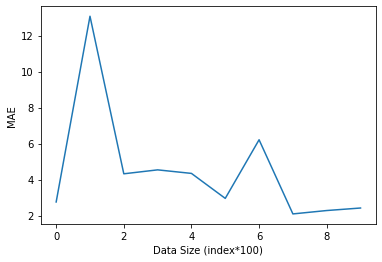

In [21]:
plt.figure(1)   
plt.plot(ftml_eval4)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [22]:

meta_step = 10
loss_ftml5 = []
total = []
all_eval_loss5 = []
all_train_loss5 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval5 = []
ftml_time5 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()

    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")
        ftml5, loss = train_maml_msl(ftml5, meta_step, dtrainx, dtraint, dvalx, dvalt)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml5, loss = update_procedure(ftml5,dtstream_x, dtstream_t)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml5, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time5.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval5.append(eval_loss)
    all_train_loss5.append(train_loss)
    all_eval_loss5.append(eval_task)


Task  0
Meta Update
Training is starting
Step 0 : loss = 13.269211769104004
Step 1 : loss = 19.677983436584473
Step 2 : loss = 19.65222689151764
Step 3 : loss = 19.62661763191223
Step 4 : loss = 19.60110750675201
Step 5 : loss = 19.575488333702086
Step 6 : loss = 19.54996687889099
Step 7 : loss = 19.52473574638367
Step 8 : loss = 19.49951169490814
Step 9 : loss = 19.47434712409973
Update Procedure
Step0 : loss = 6.5513916015625
Step1 : loss = 6.514923572540283
Step2 : loss = 6.480958461761475
Step3 : loss = 6.4523606300354
Step4 : loss = 6.428853988647461
Step5 : loss = 6.410669326782227
Step6 : loss = 6.396992206573486
Step7 : loss = 6.387636184692383
Step8 : loss = 6.381897449493408
Step9 : loss = 6.378650665283203
Data stream Batch- 0 : loss = 4.720604419708252
Meta Update
Training is starting
Step 0 : loss = 9.612414797147114
Step 1 : loss = 10.738182246685028
Step 2 : loss = 11.795095009803772
Step 3 : loss = 11.789579186439514
Step 4 : loss = 11.784468669891357
Step 5 : loss = 11

Step5 : loss = 3.0483941634496055
Step6 : loss = 3.028534730275472
Step7 : loss = 3.013773798942566
Step8 : loss = 3.0032758712768555
Step9 : loss = 2.996965924898783
Data stream Batch- 2 : loss = 12.928059577941895
Meta Update
Training is starting
Step 0 : loss = 1.6188131461586848
Step 1 : loss = 1.6239595671046387
Step 2 : loss = 1.6291052994122843
Step 3 : loss = 1.6342446134874111
Step 4 : loss = 1.638668264972253
Step 5 : loss = 1.6378808448429185
Step 6 : loss = 1.637101029534307
Step 7 : loss = 1.6363189762948012
Step 8 : loss = 1.6355382285149838
Step 9 : loss = 1.6347562581618076
Update Procedure
Step0 : loss = 2.651323914527893
Step1 : loss = 2.617060750722885
Step2 : loss = 2.585517168045044
Step3 : loss = 2.5559782683849335
Step4 : loss = 2.529249846935272
Step5 : loss = 2.506731688976288
Step6 : loss = 2.487760990858078
Step7 : loss = 2.473142623901367
Step8 : loss = 2.462490677833557
Step9 : loss = 2.4560006260871887
Data stream Batch- 3 : loss = 12.95859146118164
Meta U

Step 5 : loss = 1.9056750992520248
Step 6 : loss = 1.9056266930810268
Step 7 : loss = 1.905578357670894
Step 8 : loss = 1.9055297766260921
Step 9 : loss = 1.9054794211255994
Update Procedure
Step0 : loss = 6.949883063634236
Step1 : loss = 6.768280824025472
Step2 : loss = 6.600303292274475
Step3 : loss = 6.450793147087097
Step4 : loss = 6.329328338305156
Step5 : loss = 6.234430352846782
Step6 : loss = 6.157874782880147
Step7 : loss = 6.1024110317230225
Step8 : loss = 6.065434455871582
Step9 : loss = 6.043658296267192
Data stream Batch- 5 : loss = 5.214489698410034
Meta Update
Training is starting
Step 0 : loss = 1.8696639838247444
Step 1 : loss = 1.8695852969288769
Step 2 : loss = 1.8695067123196831
Step 3 : loss = 1.8694277530504328
Step 4 : loss = 1.8693489498665405
Step 5 : loss = 1.8692702234299108
Step 6 : loss = 1.8691910431941636
Step 7 : loss = 1.8691119420762927
Step 8 : loss = 1.8690330647577067
Step 9 : loss = 1.8689520522627672
Update Procedure
Step0 : loss = 5.9025063514709

Step8 : loss = 4.972627941519022
Step9 : loss = 4.960518449544907
Data stream Batch- 7 : loss = 5.397105693817139
Task  4
Meta Update
Training is starting
Step 0 : loss = 0.5608413771764166
Step 1 : loss = 0.5603491331211018
Step 2 : loss = 0.5598561966530695
Step 3 : loss = 0.5593628138386549
Step 4 : loss = 0.5588684255777784
Step 5 : loss = 0.558373341098992
Step 6 : loss = 0.5578776239546741
Step 7 : loss = 0.5573810317524961
Step 8 : loss = 0.5568838585638273
Step 9 : loss = 0.5563860568208205
Update Procedure
Step0 : loss = 1.1308151483535767
Step1 : loss = 1.0842136144638062
Step2 : loss = 1.0425716638565063
Step3 : loss = 1.0086560249328613
Step4 : loss = 0.9833202362060547
Step5 : loss = 0.9639654755592346
Step6 : loss = 0.9498448967933655
Step7 : loss = 0.9399166703224182
Step8 : loss = 0.9335038661956787
Step9 : loss = 0.9298534393310547
Data stream Batch- 0 : loss = 8.701754570007324
Meta Update
Training is starting
Step 0 : loss = 0.5733288460430199
Step 1 : loss = 0.57285

Step 7 : loss = 0.3117118151986943
Step 8 : loss = 0.31163202820212627
Step 9 : loss = 0.3115523166140711
Update Procedure
Step0 : loss = 10.428989251454672
Step1 : loss = 10.338805357615152
Step2 : loss = 10.264858881632486
Step3 : loss = 10.182661215464273
Step4 : loss = 10.104405721028646
Step5 : loss = 10.048777421315512
Step6 : loss = 9.999038060506185
Step7 : loss = 9.963658173878988
Step8 : loss = 9.941704114278158
Step9 : loss = 9.928561051686605
Data stream Batch- 2 : loss = 13.546794414520264
Meta Update
Training is starting
Step 0 : loss = 0.29798067604336315
Step 1 : loss = 0.29789498732850994
Step 2 : loss = 0.29780925215197757
Step 3 : loss = 0.2977235647258002
Step 4 : loss = 0.29763790103791943
Step 5 : loss = 0.29755247714135835
Step 6 : loss = 0.29746752157933865
Step 7 : loss = 0.2973825420703532
Step 8 : loss = 0.2972975876262915
Step 9 : loss = 0.29721263459289937
Update Procedure
Step0 : loss = 9.04798412322998
Step1 : loss = 8.925992012023926
Step2 : loss = 8.829

Step7 : loss = 2.2194174766540526
Step8 : loss = 2.1990018844604493
Step9 : loss = 2.1876052379608155
Data stream Batch- 4 : loss = 9.082838535308838
Meta Update
Training is starting
Step 0 : loss = 0.534723200550789
Step 1 : loss = 0.5342480295945821
Step 2 : loss = 0.533772898214846
Step 3 : loss = 0.5332977254504248
Step 4 : loss = 0.5328224713274593
Step 5 : loss = 0.5323471758954368
Step 6 : loss = 0.5318725160080324
Step 7 : loss = 0.5314227252191006
Step 8 : loss = 0.5309500283331853
Step 9 : loss = 0.5304773714174149
Update Procedure
Step0 : loss = 3.0184759895006814
Step1 : loss = 2.9423093299070993
Step2 : loss = 2.8742378453413644
Step3 : loss = 2.817058483759562
Step4 : loss = 2.768176337083181
Step5 : loss = 2.72718945145607
Step6 : loss = 2.697503298521042
Step7 : loss = 2.6753140886624656
Step8 : loss = 2.661135713259379
Step9 : loss = 2.65299129486084
Data stream Batch- 5 : loss = 8.512705326080322
Meta Update
Training is starting
Step 0 : loss = 0.5036621929305245
Step

Step 4 : loss = 0.12327961358651972
Step 5 : loss = 0.12317452673259341
Step 6 : loss = 0.12306954210632204
Step 7 : loss = 0.12296634575322177
Step 8 : loss = 0.1228638254598545
Step 9 : loss = 0.12276144924213957
Update Procedure
Step0 : loss = 4.461746208369732
Step1 : loss = 4.319077841937542
Step2 : loss = 4.1942571848630905
Step3 : loss = 4.06257189065218
Step4 : loss = 3.958454966545105
Step5 : loss = 3.8608338683843613
Step6 : loss = 3.790076218545437
Step7 : loss = 3.7345955818891525
Step8 : loss = 3.6996372789144516
Step9 : loss = 3.6793883368372917
Data stream Batch- 7 : loss = 5.959192276000977
Task  8
Meta Update
Training is starting
Step 0 : loss = 0.20938670407046006
Step 1 : loss = 0.20923026717474408
Step 2 : loss = 0.20907375372512918
Step 3 : loss = 0.2089171311025606
Step 4 : loss = 0.20876041705437692
Step 5 : loss = 0.2086035957176094
Step 6 : loss = 0.2084466964304102
Step 7 : loss = 0.2082897201055438
Step 8 : loss = 0.20813266586201504
Step 9 : loss = 0.2079754

Step6 : loss = 0.7769898176193237
Step7 : loss = 0.7689714729785919
Step8 : loss = 0.764267086982727
Step9 : loss = 0.7607775628566742
Data stream Batch- 1 : loss = 2.035716712474823
Meta Update
Training is starting
Step 0 : loss = 0.20434896300598307
Step 1 : loss = 0.2042614889744876
Step 2 : loss = 0.20417404105513137
Step 3 : loss = 0.20408659349247213
Step 4 : loss = 0.2039991724207476
Step 5 : loss = 0.20391176459416668
Step 6 : loss = 0.20382436982439345
Step 7 : loss = 0.20373700159446445
Step 8 : loss = 0.20366172619822165
Step 9 : loss = 0.20357438465304
Update Procedure
Step0 : loss = 0.7065439025561014
Step1 : loss = 0.7102993329366049
Step2 : loss = 0.6802518367767334
Step3 : loss = 0.6792405049006144
Step4 : loss = 0.6500041385491689
Step5 : loss = 0.6509726047515869
Step6 : loss = 0.6303196748097738
Step7 : loss = 0.6300315856933594
Step8 : loss = 0.6203472912311554
Step9 : loss = 0.6151804228623708
Data stream Batch- 2 : loss = 1.990032434463501
Meta Update
Training is 

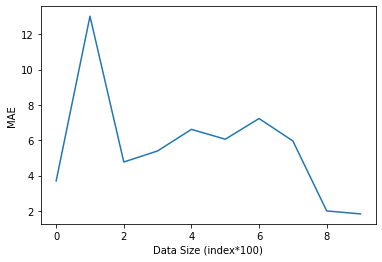

In [23]:
plt.figure(1)   
plt.plot(ftml_eval5)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [24]:

meta_step = 10
loss_ftml6 = []
total = []
all_eval_loss6 = []
all_train_loss6 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval6 = []
ftml_time6 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()
    if len(xtask_buffer) >= 24:
        xtask_buffer = xtask_buffer[8:]
        ttask_buffer = ttask_buffer[8:] 


    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")

        ftml6, loss = train_maml_msl(ftml6, meta_step, dtrainx, dtraint, dvalx, dvalt, ca=True, da=True)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml6, loss = update_procedure(ftml6,dtstream_x, dtstream_t, ca=True)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml6, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time6.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval6.append(eval_loss)
    all_train_loss6.append(train_loss)
    all_eval_loss6.append(eval_task)


Task  0
Meta Update
Training is starting
0.001
order_one
Step 0 : loss = 13.562444686889648
0.0009757729755661011
order_one
Step 1 : loss = 20.140230360031126
0.000905463412215599
order_one
Step 2 : loss = 20.140230360031126
0.0007959536998847742
order_one
Step 3 : loss = 20.140230360031126
0.000657963412215599
order_one
Step 4 : loss = 20.140230360031126
0.000505
order_one
Step 5 : loss = 20.140230360031126
0.0003520365877844011
Step 6 : loss = 20.140230360031126
0.00021404630011522585
Step 7 : loss = 20.129259009361267
0.00010453658778440107
Step 8 : loss = 20.122522115707397
3.4227024433899005e-05
Step 9 : loss = 20.1191699552536
Update Procedure
Step0 : loss = 6.777293682098389
Step1 : loss = 6.736967086791992
Step2 : loss = 6.699105739593506
Step3 : loss = 6.6650919914245605
Step4 : loss = 6.635210990905762
Step5 : loss = 6.610495090484619
Step6 : loss = 6.591364860534668
Step7 : loss = 6.577723979949951
Step8 : loss = 6.569087028503418
Step9 : loss = 6.564178943634033
Data stream

order_one
Step 0 : loss = 1.807831198931384
0.0009757729755661011
order_one
Step 1 : loss = 1.814443974841938
0.000905463412215599
order_one
Step 2 : loss = 1.8210567507524917
0.0007959536998847742
order_one
Step 3 : loss = 1.8276695266630454
0.000657963412215599
order_one
Step 4 : loss = 1.833488769464333
0.000505
order_one
Step 5 : loss = 1.833488769464333
0.0003520365877844011
Step 6 : loss = 1.833488769464333
0.00021404630011522585
Step 7 : loss = 1.8331586539359006
0.00010453658778440107
Step 8 : loss = 1.8329578410813379
3.4227024433899005e-05
Step 9 : loss = 1.8328598487184002
Update Procedure
Step0 : loss = 2.92192006111145
Step1 : loss = 2.8691370487213135
Step2 : loss = 2.8167450428009033
Step3 : loss = 2.7677276134490967
Step4 : loss = 2.724167585372925
Step5 : loss = 2.687985897064209
Step6 : loss = 2.6598565578460693
Step7 : loss = 2.6395678520202637
Step8 : loss = 2.626366376876831
Step9 : loss = 2.618809461593628
Data stream Batch- 0 : loss = 13.072773933410645
Meta Upda

order_one
Step 0 : loss = 1.944937349238101
0.0009757729755661011
order_one
Step 1 : loss = 1.944939359201792
0.000905463412215599
order_one
Step 2 : loss = 1.944941369165483
0.0007959536998847742
order_one
Step 3 : loss = 1.944943379129174
0.000657963412215599
order_one
Step 4 : loss = 1.944945389092865
0.000505
order_one
Step 5 : loss = 1.9449473990565558
0.0003520365877844011
Step 6 : loss = 1.9449494090202468
0.00021404630011522585
Step 7 : loss = 1.944929564037123
0.00010453658778440107
Step 8 : loss = 1.9449176776723143
3.4227024433899005e-05
Step 9 : loss = 1.944911139875667
Update Procedure
Step0 : loss = 5.119389057159424
Step1 : loss = 5.001652240753174
Step2 : loss = 4.887665271759033
Step3 : loss = 4.782221794128418
Step4 : loss = 4.689651966094971
Step5 : loss = 4.612865924835205
Step6 : loss = 4.5530900955200195
Step7 : loss = 4.510561943054199
Step8 : loss = 4.483201503753662
Step9 : loss = 4.467637538909912
Data stream Batch- 0 : loss = 4.538333415985107
Meta Update
Tra

order_one
Step 0 : loss = 0.6147063958092456
0.0009757729755661011
order_one
Step 1 : loss = 0.6147070310675158
0.000905463412215599
order_one
Step 2 : loss = 0.614707666325786
0.0007959536998847742
order_one
Step 3 : loss = 0.6147083015840562
0.000657963412215599
order_one
Step 4 : loss = 0.6147089368423265
0.000505
order_one
Step 5 : loss = 0.6147095721005967
0.0003520365877844011
Step 6 : loss = 0.614710207358867
0.00021404630011522585
Step 7 : loss = 0.6146293531688038
0.00010453658778440107
Step 8 : loss = 0.6145803313310105
3.4227024433899005e-05
Step 9 : loss = 0.6145560778154582
Update Procedure
Step0 : loss = 9.136810302734375
Step1 : loss = 8.963579177856445
Step2 : loss = 8.794431686401367
Step3 : loss = 8.637903213500977
Step4 : loss = 8.502402305603027
Step5 : loss = 8.390607833862305
Step6 : loss = 8.303962707519531
Step7 : loss = 8.241659164428711
Step8 : loss = 8.201159477233887
Step9 : loss = 8.177887916564941
Data stream Batch- 0 : loss = 7.462065935134888
Meta Update

order_one
Step 0 : loss = 0.5885295398685082
0.0009757729755661011
order_one
Step 1 : loss = 0.5885301480747349
0.000905463412215599
order_one
Step 2 : loss = 0.5885307562809616
0.0007959536998847742
order_one
Step 3 : loss = 0.5885313644871881
0.000657963412215599
order_one
Step 4 : loss = 0.5885319726934148
0.000505
order_one
Step 5 : loss = 0.5885325808996416
0.0003520365877844011
Step 6 : loss = 0.588533189105868
0.00021404630011522585
Step 7 : loss = 0.5866030985329451
0.00010453658778440107
Step 8 : loss = 0.5854283991359759
3.4227024433899005e-05
Step 9 : loss = 0.5848540863614585
Update Procedure
Step0 : loss = 2.238961696624756
Step1 : loss = 2.135983943939209
Step2 : loss = 2.0367591381073
Step3 : loss = 1.9454597234725952
Step4 : loss = 1.8656388521194458
Step5 : loss = 1.8003085851669312
Step6 : loss = 1.7497735023498535
Step7 : loss = 1.71360182762146
Step8 : loss = 1.6902061700820923
Step9 : loss = 1.6768710613250732
Data stream Batch- 0 : loss = 6.254396438598633
Meta Up

order_one
Step 0 : loss = 0.3100755457891058
0.0009757729755661011
order_one
Step 1 : loss = 0.31007586623160677
0.000905463412215599
order_one
Step 2 : loss = 0.3100761866741078
0.0007959536998847742
order_one
Step 3 : loss = 0.3100765071166087
0.000657963412215599
order_one
Step 4 : loss = 0.3100768275591098
0.000505
order_one
Step 5 : loss = 0.3100771480016108
0.0003520365877844011
Step 6 : loss = 0.3100774684441118
0.00021404630011522585
Step 7 : loss = 0.30922634865635223
0.00010453658778440107
Step 8 : loss = 0.30870938550205673
3.4227024433899005e-05
Step 9 : loss = 0.30845683919684486
Update Procedure
Step0 : loss = 5.196345806121826
Step1 : loss = 4.9947028160095215
Step2 : loss = 4.799237251281738
Step3 : loss = 4.614904880523682
Step4 : loss = 4.45021390914917
Step5 : loss = 4.311446666717529
Step6 : loss = 4.203355312347412
Step7 : loss = 4.125195503234863
Step8 : loss = 4.074601173400879
Step9 : loss = 4.045836448669434
Data stream Batch- 0 : loss = 5.890612840652466
Meta 

order_one
Step 0 : loss = 0.442824938172087
0.0009757729755661011
order_one
Step 1 : loss = 0.44282539580227626
0.000905463412215599
order_one
Step 2 : loss = 0.4428258534324655
0.0007959536998847742
order_one
Step 3 : loss = 0.4428263110626547
0.000657963412215599
order_one
Step 4 : loss = 0.442826768692844
0.000505
order_one
Step 5 : loss = 0.44282722632303323
0.0003520365877844011
Step 6 : loss = 0.4428276839532224
0.00021404630011522585
Step 7 : loss = 0.44075807264524314
0.00010453658778440107
Step 8 : loss = 0.4395256655369594
3.4227024433899005e-05
Step 9 : loss = 0.43913274948768766
Update Procedure
Step0 : loss = 3.616961717605591
Step1 : loss = 3.526883602142334
Step2 : loss = 3.4399073123931885
Step3 : loss = 3.3600528240203857
Step4 : loss = 3.2899651527404785
Step5 : loss = 3.2318525314331055
Step6 : loss = 3.186782121658325
Step7 : loss = 3.15445613861084
Step8 : loss = 3.1335113048553467
Step9 : loss = 3.121551513671875
Data stream Batch- 0 : loss = 10.388161182403564
Me

order_one
Step 0 : loss = 0.4295051868906474
0.0009757729755661011
order_one
Step 1 : loss = 0.42950563075575754
0.000905463412215599
order_one
Step 2 : loss = 0.4295060746208677
0.0007959536998847742
order_one
Step 3 : loss = 0.4295065184859778
0.000657963412215599
order_one
Step 4 : loss = 0.42950696235108793
0.000505
order_one
Step 5 : loss = 0.4295074062161981
0.0003520365877844011
Step 6 : loss = 0.4295078500813082
0.00021404630011522585
Step 7 : loss = 0.4286878306004783
0.00010453658778440107
Step 8 : loss = 0.4281891682442762
3.4227024433899005e-05
Step 9 : loss = 0.4279454264878602
Update Procedure
Step0 : loss = 4.959671497344971
Step1 : loss = 4.719750881195068
Step2 : loss = 4.4894633293151855
Step3 : loss = 4.281190872192383
Step4 : loss = 4.099789142608643
Step5 : loss = 3.9502575397491455
Step6 : loss = 3.834704637527466
Step7 : loss = 3.752168893814087
Step8 : loss = 3.6987791061401367
Step9 : loss = 3.6682910919189453
Data stream Batch- 0 : loss = 6.304580211639404
Met

order_one
Step 0 : loss = 0.34992458816660227
0.0009757729755661011
order_one
Step 1 : loss = 0.3499249497904443
0.000905463412215599
order_one
Step 2 : loss = 0.3499253114142864
0.0007959536998847742
order_one
Step 3 : loss = 0.3499256730381284
0.000657963412215599
order_one
Step 4 : loss = 0.3499260346619705
0.000505
order_one
Step 5 : loss = 0.34992639628581257
0.0003520365877844011
Step 6 : loss = 0.3499267579096546
0.00021404630011522585
Step 7 : loss = 0.3488704449858446
0.00010453658778440107
Step 8 : loss = 0.348120379874987
3.4227024433899005e-05
Step 9 : loss = 0.34775389849020427
Update Procedure
Step0 : loss = 3.5464043617248535
Step1 : loss = 3.432528495788574
Step2 : loss = 3.3208587169647217
Step3 : loss = 3.216888666152954
Step4 : loss = 3.1247169971466064
Step5 : loss = 3.0502257347106934
Step6 : loss = 2.993131160736084
Step7 : loss = 2.9527268409729004
Step8 : loss = 2.926823377609253
Step9 : loss = 2.911993980407715
Data stream Batch- 0 : loss = 4.646225929260254
Me

order_one
Step 0 : loss = 0.7632357120109523
0.0009757729755661011
order_one
Step 1 : loss = 0.7632365007644151
0.000905463412215599
order_one
Step 2 : loss = 0.7632372895178776
0.0007959536998847742
order_one
Step 3 : loss = 0.7632380782713402
0.000657963412215599
order_one
Step 4 : loss = 0.7632388670248028
0.000505
order_one
Step 5 : loss = 0.7632396557782655
0.0003520365877844011
Step 6 : loss = 0.763240444531728
0.00021404630011522585
Step 7 : loss = 0.762654165870692
0.00010453658778440107
Step 8 : loss = 0.7622978794606947
3.4227024433899005e-05
Step 9 : loss = 0.7621237161133536
Update Procedure
Step0 : loss = 0.5825228095054626
Step1 : loss = 0.5998923182487488
Step2 : loss = 0.5635043382644653
Step3 : loss = 0.5773550868034363
Step4 : loss = 0.5445815920829773
Step5 : loss = 0.5537441372871399
Step6 : loss = 0.531460702419281
Step7 : loss = 0.5259488821029663
Step8 : loss = 0.525566041469574
Step9 : loss = 0.520194411277771
Data stream Batch- 0 : loss = 2.642360031604767
Meta

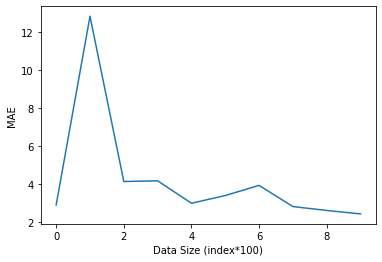

In [25]:
plt.figure(1)   
plt.plot(ftml_eval6)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

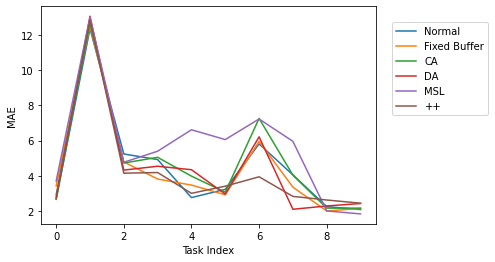

In [26]:
plt.figure(1)   
plt.plot(ftml_eval1)
plt.plot(ftml_eval2)
plt.plot(ftml_eval3)
plt.plot(ftml_eval4)
plt.plot(ftml_eval5)
plt.plot(ftml_eval6)
plt.legend(["Normal", "Fixed Buffer", "CA", "DA", "MSL", "++"], loc=(1.05, 0.5))
plt.xlabel('Task Index')
plt.ylabel('MAE')
plt.show()

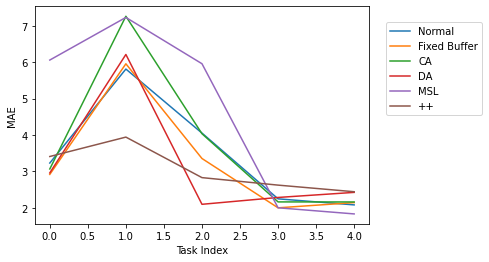

In [27]:
plt.figure(1)   
plt.plot(ftml_eval1[5:])
plt.plot(ftml_eval2[5:])
plt.plot(ftml_eval3[5:])
plt.plot(ftml_eval4[5:])
plt.plot(ftml_eval5[5:])
plt.plot(ftml_eval6[5:])
plt.legend(["Normal", "Fixed Buffer", "CA", "DA", "MSL", "++"], loc=(1.05, 0.5))
plt.xlabel('Task Index')
plt.ylabel('MAE')
plt.show()

In [28]:
# plt.figure(1)  
# plt.plot(ftml_eval)

# plt.plot(jt_res)
# plt.plot(toe_res)
# plt.plot(sc_res)


# plt.legend(["Scratch", "Joint", "TOE", "FTML"], loc=(1.05, 0.5))
# plt.xlabel('Task Index')
# plt.ylabel('MAE')
# plt.show()

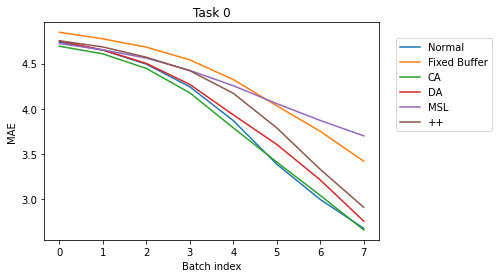

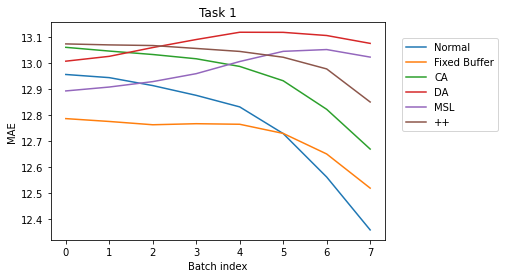

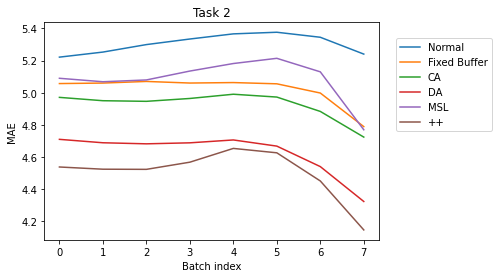

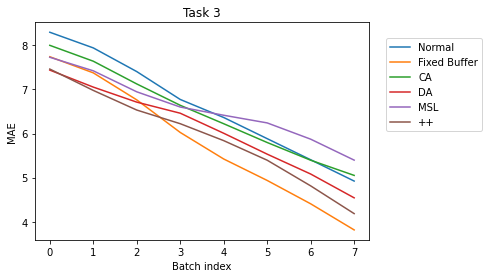

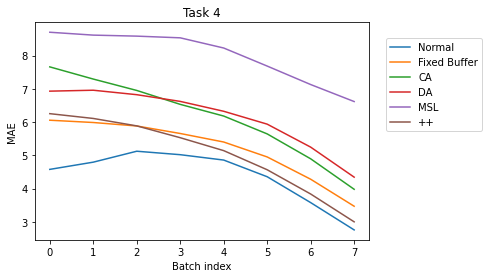

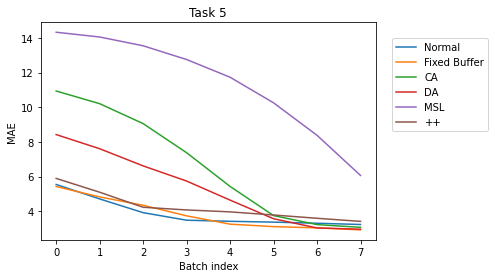

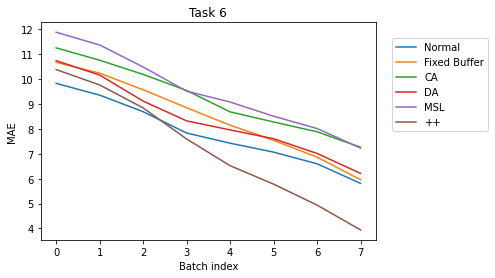

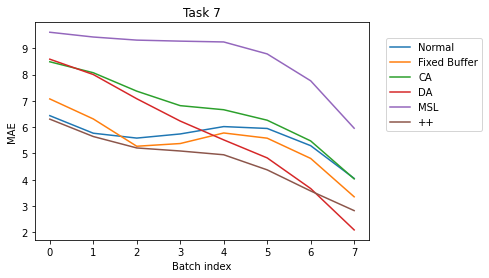

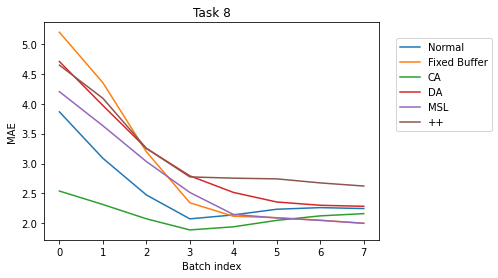

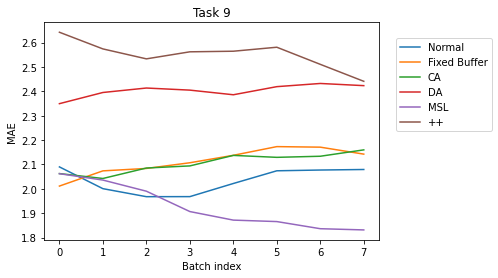

In [29]:
for i in range(10):
    plt.title("Task "+ str(i))
    plt.plot(all_eval_loss1[i])
    plt.plot(all_eval_loss2[i])
    plt.plot(all_eval_loss3[i])
    plt.plot(all_eval_loss4[i])
    plt.plot(all_eval_loss5[i])
    plt.plot(all_eval_loss6[i])

    plt.legend(["Normal", "Fixed Buffer", "CA", "DA", "MSL", "++"], loc=(1.05, 0.5))
    plt.xlabel('Batch index')
    plt.ylabel('MAE')
    plt.show()

In [30]:
# plt.figure(1)   
# plt.plot(sc_time)
# plt.plot(jt_time)
# plt.plot(toe_time)
# plt.plot(ftml_time)

# plt.legend(["Scratch", "Joint", "TOE", "FTML"], loc=(1.05, 0.5))
# plt.xlabel('Task Index')
# plt.ylabel('Second')
# plt.show()

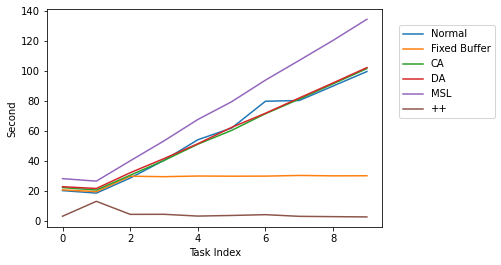

In [31]:
plt.figure(1)   
plt.plot(ftml_time1)
plt.plot(ftml_time2)
plt.plot(ftml_time3)
plt.plot(ftml_time4)
plt.plot(ftml_time5)
plt.plot(ftml_eval6)
plt.legend(["Normal", "Fixed Buffer", "CA", "DA", "MSL", "++"], loc=(1.05, 0.5))
plt.xlabel('Task Index')
plt.ylabel('Second')
plt.show()

In [32]:
model7 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [34]:
model8 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [35]:
model9 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [33]:
xtask_buffer_toe = []
ttask_buffer_toe = []
optimizer_toe = tf.keras.optimizers.Adam(learning_rate = 0.001)
toe = model7
all_toe_eval = []
toe_res = []
toe_time = []
for i in range (10):
    print("Task ", i)
    toe_eval = []
    start = time.time()
    for j in range (8):
        xtask_buffer_toe.append(traintaskx[i][j])
        ttask_buffer_toe.append(traintaskt[i][j])
        print(len(xtask_buffer_toe))
            
        all_loss = []
        for step in range (20):
            total_loss = 0
            for k in range(len(xtask_buffer_toe)):
                with tf.GradientTape() as update:
                    _,loss = model_func(toe, xtask_buffer_toe[k], ttask_buffer_toe[k])
                gradient = update.gradient(loss, toe.trainable_variables)
                optimizer_toe.apply_gradients(zip(gradient, toe.trainable_variables))
                total_loss+=loss
            print('Step{} : loss = {}'.format(step,total_loss/len(xtask_buffer_toe)))
            
        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(toe, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss
        eval_loss = tmp_loss/2
        toe_eval.append(eval_loss)
        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
    curr = time.time() - start
    toe_time.append(curr)
    toe_res.append(eval_loss)
    all_toe_eval.append(toe_eval)
        

Task  0
1
Step0 : loss = 6.805109024047852
Step1 : loss = 6.758742809295654
Step2 : loss = 6.7126569747924805
Step3 : loss = 6.667872905731201
Step4 : loss = 6.622509956359863
Step5 : loss = 6.5771870613098145
Step6 : loss = 6.5315632820129395
Step7 : loss = 6.4884772300720215
Step8 : loss = 6.449471950531006
Step9 : loss = 6.41409969329834
Step10 : loss = 6.3797125816345215
Step11 : loss = 6.346235275268555
Step12 : loss = 6.315150260925293
Step13 : loss = 6.287229537963867
Step14 : loss = 6.261441230773926
Step15 : loss = 6.2383551597595215
Step16 : loss = 6.21727180480957
Step17 : loss = 6.197990894317627
Step18 : loss = 6.179948806762695
Step19 : loss = 6.16275691986084
Data stream Batch- 0 : loss = 4.6036107540130615
2
Step0 : loss = 6.546884298324585
Step1 : loss = 6.517110824584961
Step2 : loss = 6.4890618324279785
Step3 : loss = 6.460490703582764
Step4 : loss = 6.430406332015991
Step5 : loss = 6.399065732955933
Step6 : loss = 6.366305589675903
Step7 : loss = 6.333261251449585
S

Step7 : loss = 0.8530625080068907
Step8 : loss = 0.8473034997781118
Step9 : loss = 0.8329052080710729
Step10 : loss = 0.8307317073146502
Step11 : loss = 0.8379884536067644
Step12 : loss = 0.8366326292355856
Step13 : loss = 0.8201410894592603
Step14 : loss = 0.8183603460590044
Step15 : loss = 0.8046982338031133
Step16 : loss = 0.7968407993515333
Step17 : loss = 0.7962232579787573
Step18 : loss = 0.7783725460370382
Step19 : loss = 0.7817066957553228
Data stream Batch- 3 : loss = 7.952437877655029
13
Step0 : loss = 0.9403661833359644
Step1 : loss = 0.9432096229149745
Step2 : loss = 0.9287500541943771
Step3 : loss = 0.9263756206402411
Step4 : loss = 0.9153684377670288
Step5 : loss = 0.9099270678483523
Step6 : loss = 0.907542361662938
Step7 : loss = 0.9139438111048478
Step8 : loss = 0.8937139075535995
Step9 : loss = 0.8930586117964524
Step10 : loss = 0.867518234711427
Step11 : loss = 0.8745121359825134
Step12 : loss = 0.8461561042528886
Step13 : loss = 0.8776316826160138
Step14 : loss = 0.8

Step10 : loss = 0.744401269632837
Step11 : loss = 0.7431713692519976
Step12 : loss = 0.7565931703733362
Step13 : loss = 0.7244202572366466
Step14 : loss = 0.7630655817363573
Step15 : loss = 0.7244149550147678
Step16 : loss = 0.7450227594893911
Step17 : loss = 0.7221018607201783
Step18 : loss = 0.7733470525430597
Step19 : loss = 0.7913869541624318
Data stream Batch- 6 : loss = 1.0648820102214813
24
Step0 : loss = 0.7406436689198017
Step1 : loss = 0.76777208968997
Step2 : loss = 0.786883452286323
Step3 : loss = 0.7371311572690805
Step4 : loss = 0.7601728327572346
Step5 : loss = 0.7211043164134026
Step6 : loss = 0.7627299341062704
Step7 : loss = 0.7224446187416712
Step8 : loss = 0.7351130520304044
Step9 : loss = 0.7556650253633658
Step10 : loss = 0.7297873273491859
Step11 : loss = 0.7337735667824745
Step12 : loss = 0.7374693639576435
Step13 : loss = 0.7421677969396114
Step14 : loss = 0.7577560395002365
Step15 : loss = 0.7002091705799103
Step16 : loss = 0.7242183747390906
Step17 : loss = 0

Step12 : loss = 1.1198032699963625
Step13 : loss = 1.133076622205622
Step14 : loss = 1.0978546089985792
Step15 : loss = 1.0603548148099113
Step16 : loss = 1.1896559666184818
Step17 : loss = 1.219702686457073
Step18 : loss = 1.157005647526068
Step19 : loss = 1.1815766885000116
Data stream Batch- 1 : loss = 4.704304456710815
35
Step0 : loss = 1.3713430055550166
Step1 : loss = 1.2700038484164646
Step2 : loss = 1.2860253589493889
Step3 : loss = 1.3376794244561876
Step4 : loss = 1.2501053375857216
Step5 : loss = 1.221531331539154
Step6 : loss = 1.2588008727346147
Step7 : loss = 1.2444499109472547
Step8 : loss = 1.1877453795501165
Step9 : loss = 1.1960226935999734
Step10 : loss = 1.1828806017126356
Step11 : loss = 1.2046294229371206
Step12 : loss = 1.174066025018692
Step13 : loss = 1.1854359941823143
Step14 : loss = 1.1950467331068857
Step15 : loss = 1.1626565515995027
Step16 : loss = 1.183812585898808
Step17 : loss = 1.151032384804317
Step18 : loss = 1.1026303998061588
Step19 : loss = 1.088

Step15 : loss = 1.426210903459125
Step16 : loss = 1.435134008857939
Step17 : loss = 1.377619500292672
Step18 : loss = 1.4901009261608125
Step19 : loss = 1.3849583864212036
Data stream Batch- 4 : loss = 5.470227003097534
46
Step0 : loss = 1.476344283508218
Step1 : loss = 1.5831230392922526
Step2 : loss = 1.487114334883897
Step3 : loss = 1.5016084961269214
Step4 : loss = 1.4581130801335624
Step5 : loss = 1.4364590120056402
Step6 : loss = 1.4916368256444517
Step7 : loss = 1.4456123074759608
Step8 : loss = 1.449203042232472
Step9 : loss = 1.4688152210867924
Step10 : loss = 1.467014135873836
Step11 : loss = 1.6098641558833744
Step12 : loss = 1.4952328069054561
Step13 : loss = 1.4537527755550717
Step14 : loss = 1.4689003209704938
Step15 : loss = 1.4664567372073298
Step16 : loss = 1.466364292346913
Step17 : loss = 1.4535161386365476
Step18 : loss = 1.3865100527587144
Step19 : loss = 1.5363491093334944
Data stream Batch- 5 : loss = 5.186785697937012
47
Step0 : loss = 1.5328269816459494
Step1 :

Step18 : loss = 1.430589108062642
Step19 : loss = 1.425070301762649
Data stream Batch- 7 : loss = 5.0556557178497314
Task  7
57
Step0 : loss = 1.4497323888435698
Step1 : loss = 1.429254986215056
Step2 : loss = 1.3809074631385636
Step3 : loss = 1.4657580873422456
Step4 : loss = 1.4687796407624294
Step5 : loss = 1.463139343157149
Step6 : loss = 1.494588374568705
Step7 : loss = 1.440034854830357
Step8 : loss = 1.4910604634828735
Step9 : loss = 1.5008715584612728
Step10 : loss = 1.4352132163026876
Step11 : loss = 1.4237621413511143
Step12 : loss = 1.4291021630429386
Step13 : loss = 1.4710148321954828
Step14 : loss = 1.4563102879022296
Step15 : loss = 1.4895815470239573
Step16 : loss = 1.4586834332399201
Step17 : loss = 1.41202218595304
Step18 : loss = 1.4632772654294968
Step19 : loss = 1.4788811180675239
Data stream Batch- 0 : loss = 6.458897352218628
58
Step0 : loss = 1.4813387116481518
Step1 : loss = 1.4899939105942333
Step2 : loss = 1.4521690422090991
Step3 : loss = 1.4626042601363411
S

Step0 : loss = 1.6038876451990183
Step1 : loss = 1.5371637339977657
Step2 : loss = 1.5961919593460419
Step3 : loss = 1.5436744128956514
Step4 : loss = 1.6063760387546875
Step5 : loss = 1.534787198638215
Step6 : loss = 1.6018299811026628
Step7 : loss = 1.534281574847067
Step8 : loss = 1.585994052098078
Step9 : loss = 1.5280357191667837
Step10 : loss = 1.5829857408123857
Step11 : loss = 1.5176021180608694
Step12 : loss = 1.5733795556075432
Step13 : loss = 1.5113864245221895
Step14 : loss = 1.5706628626760315
Step15 : loss = 1.5120275417233215
Step16 : loss = 1.5628376778434305
Step17 : loss = 1.505166977424832
Step18 : loss = 1.5671504271381043
Step19 : loss = 1.4959984397625221
Data stream Batch- 3 : loss = 3.3236875534057617
69
Step0 : loss = 1.572481258191924
Step1 : loss = 1.5115199369796808
Step2 : loss = 1.5629546931688336
Step3 : loss = 1.5240980894237324
Step4 : loss = 1.5774739812249723
Step5 : loss = 1.5048884673826937
Step6 : loss = 1.5614943841229314
Step7 : loss = 1.51116250

Step3 : loss = 1.40886123836795
Step4 : loss = 1.4022043085173717
Step5 : loss = 1.3864834725479536
Step6 : loss = 1.3688925863066805
Step7 : loss = 1.3467790722092496
Step8 : loss = 1.3766556086042259
Step9 : loss = 1.3643130594039266
Step10 : loss = 1.3907127378484871
Step11 : loss = 1.3902730147672604
Step12 : loss = 1.390641446355023
Step13 : loss = 1.3740106257079523
Step14 : loss = 1.3392084189985372
Step15 : loss = 1.334132121333593
Step16 : loss = 1.3594539901123772
Step17 : loss = 1.3550234819892086
Step18 : loss = 1.3703819632152967
Step19 : loss = 1.3650403173663948
Data stream Batch- 6 : loss = 2.533378303050995
80
Step0 : loss = 1.4144143035635353
Step1 : loss = 1.3849011676385998
Step2 : loss = 1.389829831570387
Step3 : loss = 1.375549509562552
Step4 : loss = 1.3844966216012835
Step5 : loss = 1.417480954900384
Step6 : loss = 1.4049807405099273
Step7 : loss = 1.394828345440328
Step8 : loss = 1.3779662255197764
Step9 : loss = 1.3979540375992656
Step10 : loss = 1.39567682128

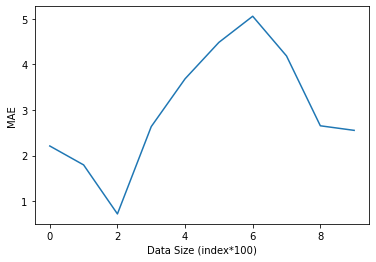

In [36]:
plt.figure(1)   
plt.plot(toe_res)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [38]:
xtask_buffer_jt= []
ttask_buffer_jt = []
optimizer_jt = tf.keras.optimizers.Adam(learning_rate = 0.001)
jt = model8
all_jt_eval = []
jt_res = []
jt_time = []
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    jt_eval = []
    start = time.time()
    for j in range (8):
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        for step in range (20):
            total_loss = 0
            for k in range(len(dtstream_x)):
                with tf.GradientTape() as update:
                    _,loss = model_func(jt, dtstream_x, dtstream_t)
                gradient = update.gradient(loss, jt.trainable_variables)
                optimizer_jt.apply_gradients(zip(gradient, jt.trainable_variables))
                total_loss+=loss
            print('Step{} : loss = {}'.format(step,total_loss/len(dtstream_x)))
        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(jt, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss
        eval_loss = tmp_loss/2
        jt_eval.append(eval_loss)
        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
    curr = time.time() - start
    jt_time.append(curr)
    all_jt_eval.append(jt_eval)
    jt_res.append(eval_loss)

Task  0
Step0 : loss = 6.7407331466674805
Step1 : loss = 6.714000225067139
Step2 : loss = 6.692129611968994
Step3 : loss = 6.675183296203613
Step4 : loss = 6.663363456726074
Step5 : loss = 6.656060695648193
Step6 : loss = 6.6500091552734375
Step7 : loss = 6.644801139831543
Step8 : loss = 6.64113712310791
Step9 : loss = 6.638355255126953
Step10 : loss = 6.63646125793457
Step11 : loss = 6.634918689727783
Step12 : loss = 6.633481979370117
Step13 : loss = 6.6320881843566895
Step14 : loss = 6.630765438079834
Step15 : loss = 6.629562854766846
Step16 : loss = 6.628434658050537
Step17 : loss = 6.627378463745117
Step18 : loss = 6.626371383666992
Step19 : loss = 6.625370979309082
Data stream Batch- 0 : loss = 4.766502618789673
Step0 : loss = 7.044928550720215
Step1 : loss = 7.042928457260132
Step2 : loss = 7.040931463241577
Step3 : loss = 7.038928270339966
Step4 : loss = 7.036928415298462
Step5 : loss = 7.034928560256958
Step6 : loss = 7.032928466796875
Step7 : loss = 7.030928611755371
Step8 : l

Step11 : loss = 2.3943955302238464
Step12 : loss = 2.3865559101104736
Step13 : loss = 2.380855619907379
Step14 : loss = 2.3760830760002136
Step15 : loss = 2.372507870197296
Step16 : loss = 2.369264543056488
Step17 : loss = 2.366399884223938
Step18 : loss = 2.36386901140213
Step19 : loss = 2.361411988735199
Data stream Batch- 3 : loss = 12.742220401763916
Step0 : loss = 2.7643102169036866
Step1 : loss = 2.7596760749816895
Step2 : loss = 2.7549100875854493
Step3 : loss = 2.748035430908203
Step4 : loss = 2.7418659687042237
Step5 : loss = 2.7369191646575928
Step6 : loss = 2.7328205585479735
Step7 : loss = 2.729026699066162
Step8 : loss = 2.7256295680999756
Step9 : loss = 2.7230381965637207
Step10 : loss = 2.721137285232544
Step11 : loss = 2.7195218563079835
Step12 : loss = 2.7180163860321045
Step13 : loss = 2.71673526763916
Step14 : loss = 2.715663480758667
Step15 : loss = 2.714606761932373
Step16 : loss = 2.7135881900787355
Step17 : loss = 2.7126341819763184
Step18 : loss = 2.711720228195

Step19 : loss = 5.4765802792140414
Data stream Batch- 6 : loss = 5.119340896606445
Step0 : loss = 6.2545729875564575
Step1 : loss = 6.243518233299255
Step2 : loss = 6.24002993106842
Step3 : loss = 6.239362359046936
Step4 : loss = 6.239272177219391
Step5 : loss = 6.239035129547119
Step6 : loss = 6.238745927810669
Step7 : loss = 6.238541841506958
Step8 : loss = 6.238414824008942
Step9 : loss = 6.23828262090683
Step10 : loss = 6.238166272640228
Step11 : loss = 6.238052129745483
Step12 : loss = 6.237940728664398
Step13 : loss = 6.23783552646637
Step14 : loss = 6.237734258174896
Step15 : loss = 6.237634599208832
Step16 : loss = 6.237537682056427
Step17 : loss = 6.237444579601288
Step18 : loss = 6.237353026866913
Step19 : loss = 6.237263739109039
Data stream Batch- 7 : loss = 5.112949371337891
Task  3
Step0 : loss = 13.744450569152832
Step1 : loss = 13.654738426208496
Step2 : loss = 13.536650657653809
Step3 : loss = 13.40776252746582
Step4 : loss = 13.270995140075684
Step5 : loss = 13.130379

Step13 : loss = 4.590412775675456
Step14 : loss = 4.589617729187012
Step15 : loss = 4.588835080464681
Step16 : loss = 4.588122526804606
Step17 : loss = 4.5872829755147295
Step18 : loss = 4.586520989735921
Step19 : loss = 4.585695584615071
Data stream Batch- 2 : loss = 12.186119556427002
Step0 : loss = 8.290804624557495
Step1 : loss = 8.273381471633911
Step2 : loss = 8.266842603683472
Step3 : loss = 8.25558853149414
Step4 : loss = 8.249817848205566
Step5 : loss = 8.242532968521118
Step6 : loss = 8.236272096633911
Step7 : loss = 8.231757879257202
Step8 : loss = 8.2272207736969
Step9 : loss = 8.223026514053345
Step10 : loss = 8.218583822250366
Step11 : loss = 8.214750289916992
Step12 : loss = 8.21090054512024
Step13 : loss = 8.20734429359436
Step14 : loss = 8.203985452651978
Step15 : loss = 8.200804233551025
Step16 : loss = 8.197758913040161
Step17 : loss = 8.194891214370728
Step18 : loss = 8.192395448684692
Step19 : loss = 8.190627574920654
Data stream Batch- 3 : loss = 11.82674312591552

Step0 : loss = 6.7638837950570245
Step1 : loss = 6.692768028804234
Step2 : loss = 6.627261911119733
Step3 : loss = 6.5825026375906805
Step4 : loss = 6.551663603101458
Step5 : loss = 6.53652218409947
Step6 : loss = 6.526746204921177
Step7 : loss = 6.519173690250942
Step8 : loss = 6.511554718017578
Step9 : loss = 6.504347460610526
Step10 : loss = 6.497105189732143
Step11 : loss = 6.490369728633335
Step12 : loss = 6.484015124184745
Step13 : loss = 6.478322505950928
Step14 : loss = 6.4730667386736185
Step15 : loss = 6.468380928039551
Step16 : loss = 6.464140619550433
Step17 : loss = 6.460244178771973
Step18 : loss = 6.4567962374006
Step19 : loss = 6.4538091250828336
Data stream Batch- 6 : loss = 10.243568897247314
Step0 : loss = 6.56083220243454
Step1 : loss = 6.512633323669434
Step2 : loss = 6.469653010368347
Step3 : loss = 6.436815142631531
Step4 : loss = 6.413577616214752
Step5 : loss = 6.398660242557526
Step6 : loss = 6.390843451023102
Step7 : loss = 6.38749223947525
Step8 : loss = 6.3

Step17 : loss = 2.1080926656723022
Step18 : loss = 1.9738043546676636
Step19 : loss = 1.8360443711280823
Data stream Batch- 1 : loss = 9.355859279632568
Step0 : loss = 2.412903070449829
Step1 : loss = 2.2343804041544595
Step2 : loss = 2.1558915774027505
Step3 : loss = 2.1012140115102134
Step4 : loss = 2.045405308405558
Step5 : loss = 2.0335732301076255
Step6 : loss = 2.037182013193766
Step7 : loss = 2.0310024420420327
Step8 : loss = 2.0186628500620523
Step9 : loss = 2.0123277505238852
Step10 : loss = 2.0071818828582764
Step11 : loss = 1.9979195992151897
Step12 : loss = 1.9871955315272014
Step13 : loss = 1.9778122901916504
Step14 : loss = 1.9706689914067586
Step15 : loss = 1.9625810384750366
Step16 : loss = 1.9550741116205852
Step17 : loss = 1.9507073163986206
Step18 : loss = 1.9461045265197754
Step19 : loss = 1.9414588610331218
Data stream Batch- 2 : loss = 9.308819770812988
Step0 : loss = 2.104962646961212
Step1 : loss = 2.0666017532348633
Step2 : loss = 2.024657130241394
Step3 : loss

Step5 : loss = 7.113733847935994
Step6 : loss = 7.112634579340617
Step7 : loss = 7.111925999323527
Step8 : loss = 7.11141562461853
Step9 : loss = 7.111048301060994
Step10 : loss = 7.110742171605428
Step11 : loss = 7.110461473464966
Step12 : loss = 7.1102294921875
Step13 : loss = 7.110003153483073
Step14 : loss = 7.109883626302083
Step15 : loss = 7.10972539583842
Step16 : loss = 7.1095817883809405
Step17 : loss = 7.109389861424764
Step18 : loss = 7.109186251958211
Step19 : loss = 7.109025637308757
Data stream Batch- 5 : loss = 3.208863377571106
Step0 : loss = 7.481694289616176
Step1 : loss = 7.467164039611816
Step2 : loss = 7.459876673562186
Step3 : loss = 7.4554397719247
Step4 : loss = 7.45224346433367
Step5 : loss = 7.44973121370588
Step6 : loss = 7.447670664106097
Step7 : loss = 7.445859704698835
Step8 : loss = 7.444168840135847
Step9 : loss = 7.442532062530518
Step10 : loss = 7.440924235752651
Step11 : loss = 7.4393647738865445
Step12 : loss = 7.43788834980556
Step13 : loss = 7.4365

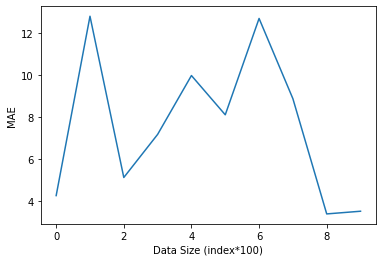

In [39]:
plt.figure(1)   
plt.plot(jt_res)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [40]:
xtask_buffer_sc= []
ttask_buffer_sc = []
optimizer_sc = tf.keras.optimizers.Adam(learning_rate = 0.001)
all_sc_eval = []
sc_res = []
sc_time= []
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    sc_eval = []
    sc = model9
    start = time.time()
    for j in range (8):
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        for step in range (20):
            total_loss = 0
            for k in range(len(dtstream_x)):
                with tf.GradientTape() as update:
                    _,loss = model_func(sc, dtstream_x, dtstream_t)
                gradient = update.gradient(loss, sc.trainable_variables)
                optimizer_sc.apply_gradients(zip(gradient, sc.trainable_variables))
                total_loss+=loss
            print('Step{} : loss = {}'.format(step,total_loss/len(dtstream_x)))
        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(sc, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss
        eval_loss = tmp_loss/2
        sc_eval.append(eval_loss)
        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
    curr = time.time() - start
    sc_time.append(curr)
    all_sc_eval.append(sc_eval)
    sc_res.append(eval_loss)

Task  0
Step0 : loss = 6.807839870452881
Step1 : loss = 6.767599582672119
Step2 : loss = 6.728686332702637
Step3 : loss = 6.692138671875
Step4 : loss = 6.657869338989258
Step5 : loss = 6.6276326179504395
Step6 : loss = 6.600365161895752
Step7 : loss = 6.574754238128662
Step8 : loss = 6.5495219230651855
Step9 : loss = 6.5249552726745605
Step10 : loss = 6.500542640686035
Step11 : loss = 6.476160049438477
Step12 : loss = 6.4513373374938965
Step13 : loss = 6.427036285400391
Step14 : loss = 6.4077301025390625
Step15 : loss = 6.393716812133789
Step16 : loss = 6.381256580352783
Step17 : loss = 6.367856979370117
Step18 : loss = 6.352581024169922
Step19 : loss = 6.335595607757568
Data stream Batch- 0 : loss = 4.6880083084106445
Step0 : loss = 6.7135090827941895
Step1 : loss = 6.674317359924316
Step2 : loss = 6.63268518447876
Step3 : loss = 6.5885844230651855
Step4 : loss = 6.5402092933654785
Step5 : loss = 6.48801851272583
Step6 : loss = 6.431475400924683
Step7 : loss = 6.370490789413452
Step8 

Step11 : loss = 2.3362995982170105
Step12 : loss = 2.3339931964874268
Step13 : loss = 2.331802785396576
Step14 : loss = 2.3298391103744507
Step15 : loss = 2.3281325101852417
Step16 : loss = 2.3267343044281006
Step17 : loss = 2.3254939913749695
Step18 : loss = 2.324424147605896
Step19 : loss = 2.3234702944755554
Data stream Batch- 3 : loss = 12.77239179611206
Step0 : loss = 2.7633927345275877
Step1 : loss = 2.7419995307922362
Step2 : loss = 2.7250433921813966
Step3 : loss = 2.7076030731201173
Step4 : loss = 2.6934011936187745
Step5 : loss = 2.6891833782196044
Step6 : loss = 2.686685800552368
Step7 : loss = 2.6834203243255614
Step8 : loss = 2.680398941040039
Step9 : loss = 2.678138589859009
Step10 : loss = 2.6766966342926026
Step11 : loss = 2.6753196716308594
Step12 : loss = 2.6739421844482423
Step13 : loss = 2.6726375102996824
Step14 : loss = 2.6714056015014647
Step15 : loss = 2.670212459564209
Step16 : loss = 2.66903018951416
Step17 : loss = 2.667882204055786
Step18 : loss = 2.66677961

Step1 : loss = 6.248574078083038
Step2 : loss = 6.243384540081024
Step3 : loss = 6.240344703197479
Step4 : loss = 6.238675177097321
Step5 : loss = 6.2378928661346436
Step6 : loss = 6.237243115901947
Step7 : loss = 6.236854791641235
Step8 : loss = 6.236558258533478
Step9 : loss = 6.236322343349457
Step10 : loss = 6.2361491322517395
Step11 : loss = 6.236021816730499
Step12 : loss = 6.2359126806259155
Step13 : loss = 6.235821485519409
Step14 : loss = 6.235738575458527
Step15 : loss = 6.235659837722778
Step16 : loss = 6.235584080219269
Step17 : loss = 6.235529065132141
Step18 : loss = 6.235487103462219
Step19 : loss = 6.235445320606232
Data stream Batch- 7 : loss = 5.8464674949646
Task  3
Step0 : loss = 15.447892189025879
Step1 : loss = 15.269023895263672
Step2 : loss = 15.001517295837402
Step3 : loss = 14.684460639953613
Step4 : loss = 14.340821266174316
Step5 : loss = 13.982710838317871
Step6 : loss = 13.62527847290039
Step7 : loss = 13.27637004852295
Step8 : loss = 12.956869125366211
St

Step12 : loss = 4.542173703511556
Step13 : loss = 4.538937250773112
Step14 : loss = 4.53545602162679
Step15 : loss = 4.531899929046631
Step16 : loss = 4.528385639190674
Step17 : loss = 4.5252532958984375
Step18 : loss = 4.5234724680582685
Step19 : loss = 4.522246201833089
Data stream Batch- 2 : loss = 13.303528785705566
Step0 : loss = 8.191025018692017
Step1 : loss = 8.173814535140991
Step2 : loss = 8.15910530090332
Step3 : loss = 8.150086402893066
Step4 : loss = 8.14916467666626
Step5 : loss = 8.146837949752808
Step6 : loss = 8.144758224487305
Step7 : loss = 8.143263339996338
Step8 : loss = 8.141247272491455
Step9 : loss = 8.14013671875
Step10 : loss = 8.14001202583313
Step11 : loss = 8.139518737792969
Step12 : loss = 8.138789415359497
Step13 : loss = 8.138450145721436
Step14 : loss = 8.138127088546753
Step15 : loss = 8.137933015823364
Step16 : loss = 8.137691736221313
Step17 : loss = 8.137528657913208
Step18 : loss = 8.137337446212769
Step19 : loss = 8.137206792831421
Data stream Bat

Step2 : loss = 6.72731808253697
Step3 : loss = 6.671597276415143
Step4 : loss = 6.614589078085763
Step5 : loss = 6.5734551293509345
Step6 : loss = 6.55132177897862
Step7 : loss = 6.534619740077427
Step8 : loss = 6.518757207053048
Step9 : loss = 6.5038236890520364
Step10 : loss = 6.488801070622036
Step11 : loss = 6.474709102085659
Step12 : loss = 6.464038508278983
Step13 : loss = 6.456900869097028
Step14 : loss = 6.452445983886719
Step15 : loss = 6.448910508837018
Step16 : loss = 6.445935521806989
Step17 : loss = 6.443334511348179
Step18 : loss = 6.440780912126813
Step19 : loss = 6.438252108437674
Data stream Batch- 6 : loss = 11.00471305847168
Step0 : loss = 6.593349277973175
Step1 : loss = 6.555263876914978
Step2 : loss = 6.51471084356308
Step3 : loss = 6.478781759738922
Step4 : loss = 6.449429035186768
Step5 : loss = 6.425786256790161
Step6 : loss = 6.407313346862793
Step7 : loss = 6.394466042518616
Step8 : loss = 6.386621534824371
Step9 : loss = 6.382316589355469
Step10 : loss = 6.3

Step13 : loss = 1.318331778049469
Step14 : loss = 1.297841727733612
Step15 : loss = 1.2903295755386353
Step16 : loss = 1.2963631749153137
Step17 : loss = 1.3005598187446594
Step18 : loss = 1.298512876033783
Step19 : loss = 1.2884872555732727
Data stream Batch- 1 : loss = 9.25243854522705
Step0 : loss = 2.1456337769826255
Step1 : loss = 2.0981101989746094
Step2 : loss = 2.056672970453898
Step3 : loss = 2.0242554346720376
Step4 : loss = 2.0009810527165732
Step5 : loss = 1.9910862445831299
Step6 : loss = 1.981845776240031
Step7 : loss = 1.9797718524932861
Step8 : loss = 1.9755123456319172
Step9 : loss = 1.9693689743677776
Step10 : loss = 1.9615349769592285
Step11 : loss = 1.9530340433120728
Step12 : loss = 1.9473014275232952
Step13 : loss = 1.9431334733963013
Step14 : loss = 1.9387662013371785
Step15 : loss = 1.9337476094563801
Step16 : loss = 1.9287963310877483
Step17 : loss = 1.924670656522115
Step18 : loss = 1.9207338492075603
Step19 : loss = 1.916816512743632
Data stream Batch- 2 : lo

Step1 : loss = 7.135307312011719
Step2 : loss = 7.132183313369751
Step3 : loss = 7.128480037053426
Step4 : loss = 7.1257608731587725
Step5 : loss = 7.124072631200154
Step6 : loss = 7.122824827829997
Step7 : loss = 7.121632814407349
Step8 : loss = 7.120700041453044
Step9 : loss = 7.119853178660075
Step10 : loss = 7.119124333063762
Step11 : loss = 7.118414560953776
Step12 : loss = 7.117772181828816
Step13 : loss = 7.11714227994283
Step14 : loss = 7.116565863291423
Step15 : loss = 7.115994771321614
Step16 : loss = 7.115431785583496
Step17 : loss = 7.114937861760457
Step18 : loss = 7.11445426940918
Step19 : loss = 7.1140139897664385
Data stream Batch- 5 : loss = 3.798049807548523
Step0 : loss = 7.482095922742571
Step1 : loss = 7.465851170676095
Step2 : loss = 7.4589305605207175
Step3 : loss = 7.454793793814523
Step4 : loss = 7.450067247663226
Step5 : loss = 7.44660268511091
Step6 : loss = 7.443689550672259
Step7 : loss = 7.4407292774745395
Step8 : loss = 7.437826905931745
Step9 : loss = 7.

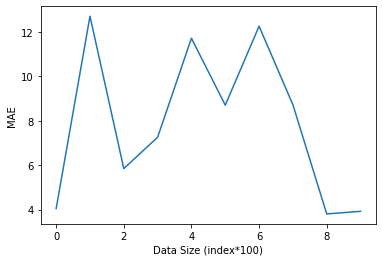

In [41]:
plt.figure(1)   
plt.plot(sc_res)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

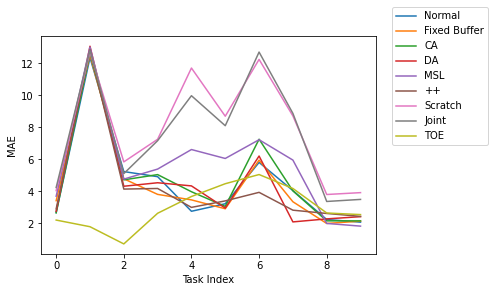

In [45]:
plt.figure(1)   
plt.plot(ftml_eval1)
plt.plot(ftml_eval2)
plt.plot(ftml_eval3)
plt.plot(ftml_eval4)
plt.plot(ftml_eval5)
plt.plot(ftml_eval6)
plt.plot(sc_res)
plt.plot(jt_res)
plt.plot(toe_res)

plt.legend(["Normal", "Fixed Buffer", "CA", "DA", "MSL", "++","Scratch", "Joint", "TOE"], loc=(1.05, 0.5))
plt.xlabel('Task Index')
plt.ylabel('MAE')
plt.show()